### Reading and Understanding the Data


In [1]:
#Import libraries
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
#Reading the data
data = pd.read_csv(r"Leads.csv")

#### Basic sanity

In [3]:
#Head of the dataset
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Dimensions of the dataframe
data.shape

(9240, 37)

In [5]:
#statistical aspects of the dataframe
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
#type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Checking the null values
data.isnull().sum().sort_values(ascending = False) 

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [8]:
#Checking null values in %
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [9]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
col  = ['Do Not Email' , 'Do Not Call' , 'Converted' , 'Search' ,  'Magazine' ,  'Newspaper Article',  'X Education Forums', 
'Newspaper' ,'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
'Update me on Supply Chain Content', 
'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview' ]

# Data Preparation

#### Converting some binary variables (Yes/No) to 0/1¶

In [11]:
varlist =  ['Do Not Email' , 'Do Not Call'  , 'Search' ,  'Magazine' ,  'Newspaper Article',  'X Education Forums', 
'Newspaper' ,'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview' ]

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

data[varlist] = data[varlist].apply(binary_map)

In [12]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

In [13]:
data.nunique().sort_values(ascending = False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
Lead Quality                

In [14]:
#Dropping the columns
data= data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [15]:
data.nunique().sort_values(ascending = False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
Lead Profile                                        6
What is your current occupation                     6
Lead Origin                                         5
Lead Quality                

In [16]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations                                 Tags  \
0                        0          Interested in other courses   
1                        0                              Ringing   
2                        0  Will revert after reading the email   
3                        0                              Ringing   
4                        0  Will revert after reading the email   

       Lead Quality    Lead Profile    City Asymmetrique Activity Index  \
0  Low in Relevance          Select  Select                   02.Medium   
1               NaN          Select  Select                   02.Medium   
2          Might be  Potential Lead  Mumbai                   02.Medium   
3          Not Sure          Select  Mumbai                   02.Medium   
4          Might be          Select  Mumbai                   02.Medium   

  Asymmetrique Profile Index  Asymmetrique Activity Score  \
0                  02.Medium                         15.0   
1                  02.Medium                         15.0   
2                    01.High                         14.0   
3                    01.High         

In [17]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)).sort_values(ascending = False), 2)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

In [18]:
data.shape

(9240, 32)

In [19]:
#Dropping the columns
cols = ['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number']
data = data.drop(cols,axis=1)
data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0     NaN                   Select                      Unemployed   
1   India                   Select                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                   Select                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [20]:
data['Specialization'].value_counts(ascending = False)

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
data['What matters most to you in choosing a course'].value_counts(ascending = False)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
data['Country'].value_counts(ascending = False)

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Kuwait                     4
Canada                     4
Germany                    4
South Africa               4
Sweden                     3
China                      2
Asia/Pacific Region        2
Netherlands                2
Bangladesh                 2
Uganda                     2
Italy                      2
Belgium                    2
Ghana                      2
Philippines                2
Switzerland                1
Denmark                    1
Tanzania                   1
Liberia                    1
Kenya                      1
Vietnam                    1
Indonesia     

In [23]:
data['What is your current occupation'].value_counts(ascending = False)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
data.shape

(9240, 22)

In [25]:
#Handling the null values
data['Specialization'] = data['Specialization'].fillna('not provided') 
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna('not provided')
data['Country'] = data['Country'].fillna('not provided')
data['What is your current occupation'] = data['What is your current occupation'].fillna('not provided')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   int64  
 4   Do Not Call                                    9240 non-null   int64  
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [26]:
# Rechecking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Prospect ID                                      0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
Newspaper Article                                0.00
Search                                           0.00
Specialization                                   0.00
What is your current occupation                  0.00
Lead Origin                                      0.00
Country                                          0.00
Total Time Spent on Website                      0.00
Converted                   

In [27]:
data = data.dropna()

In [28]:
data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

        Country           Specialization What is your current occupation  \
0  not provided                   Select                      Unemployed   
1         India                   Select                      Unemployed   
2         India  Business Administration                         Student   
3         India    Media and Advertising                      Unemployed   
4         India                   Select                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [29]:
data.shape

(9074, 22)

In [30]:
#Checking if any null values
data.isnull().sum()

Prospect ID                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [31]:
data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Visualising the Data

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   int64  
 4   Do Not Call                                    9074 non-null   int64  
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

#### Univariate Analysis

<Figure size 432x288 with 0 Axes>

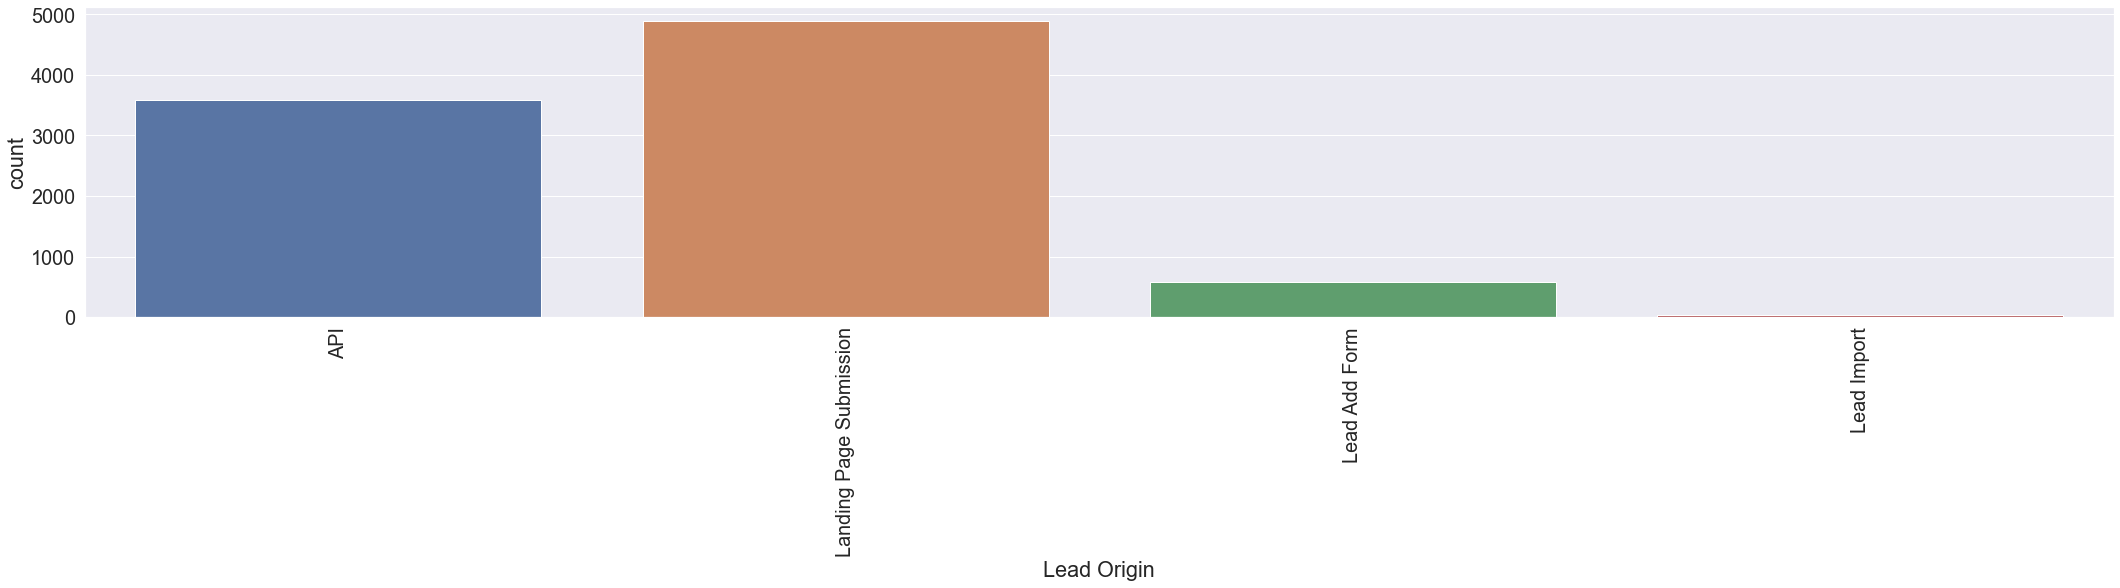

<Figure size 432x288 with 0 Axes>

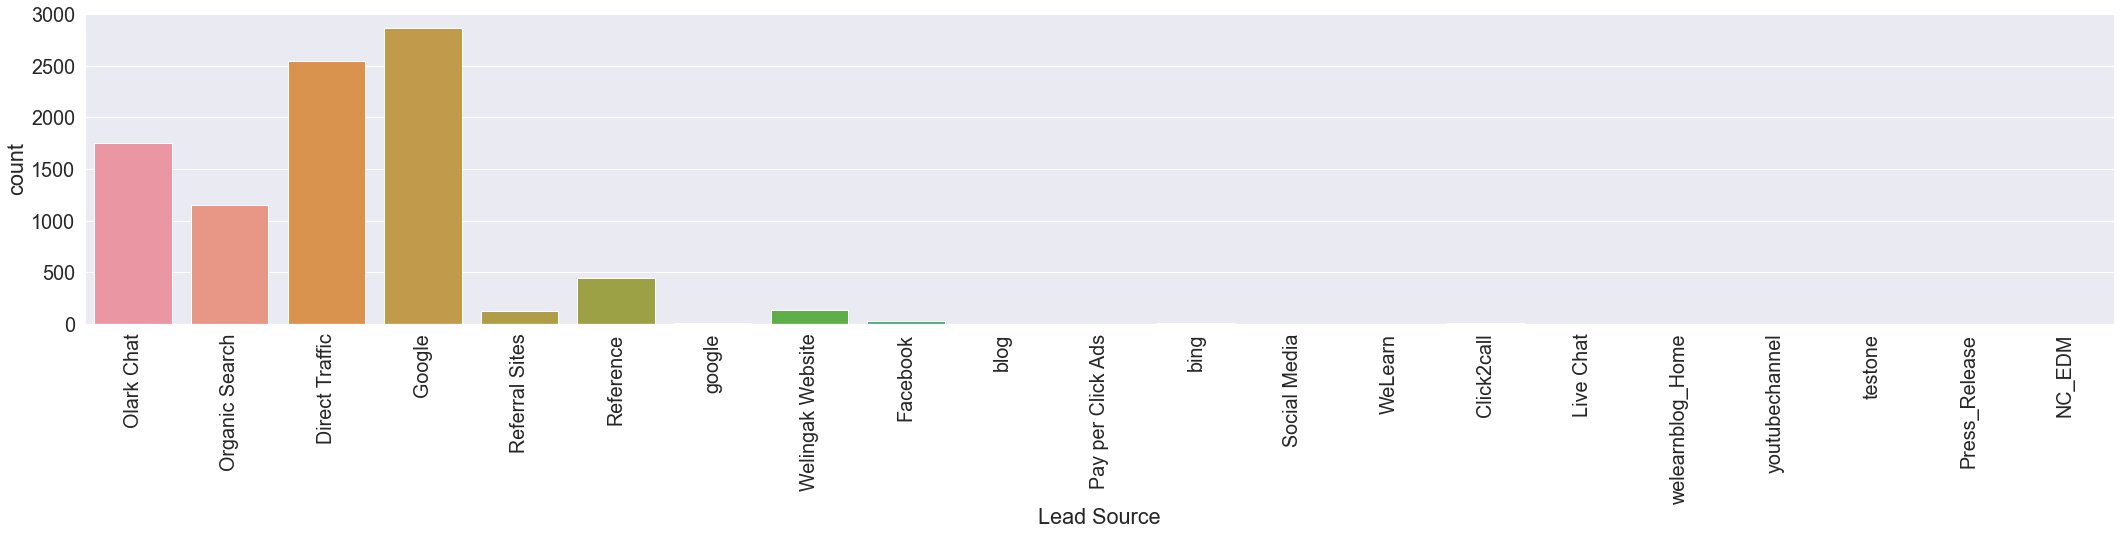

<Figure size 432x288 with 0 Axes>

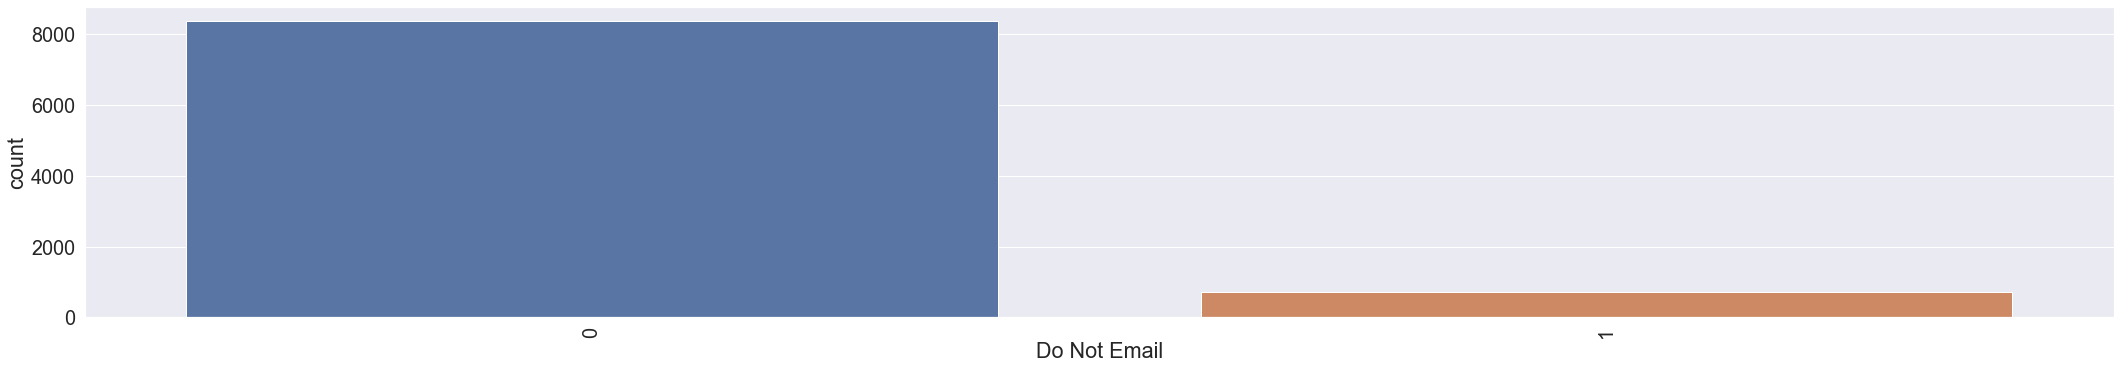

<Figure size 432x288 with 0 Axes>

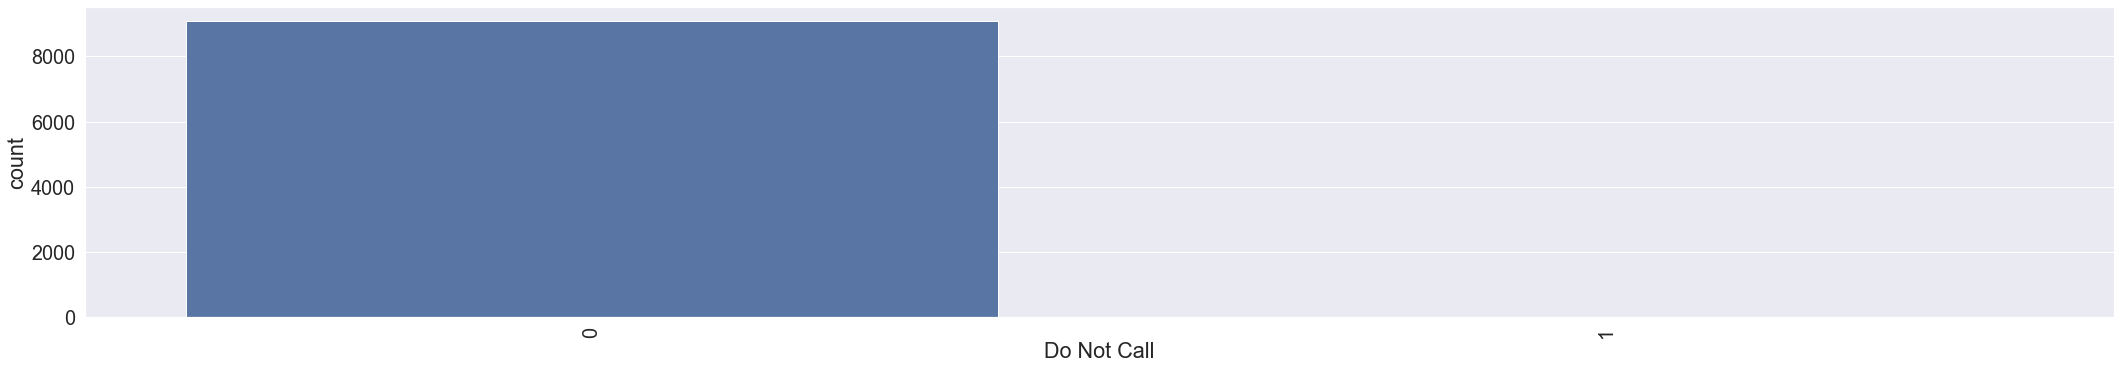

<Figure size 432x288 with 0 Axes>

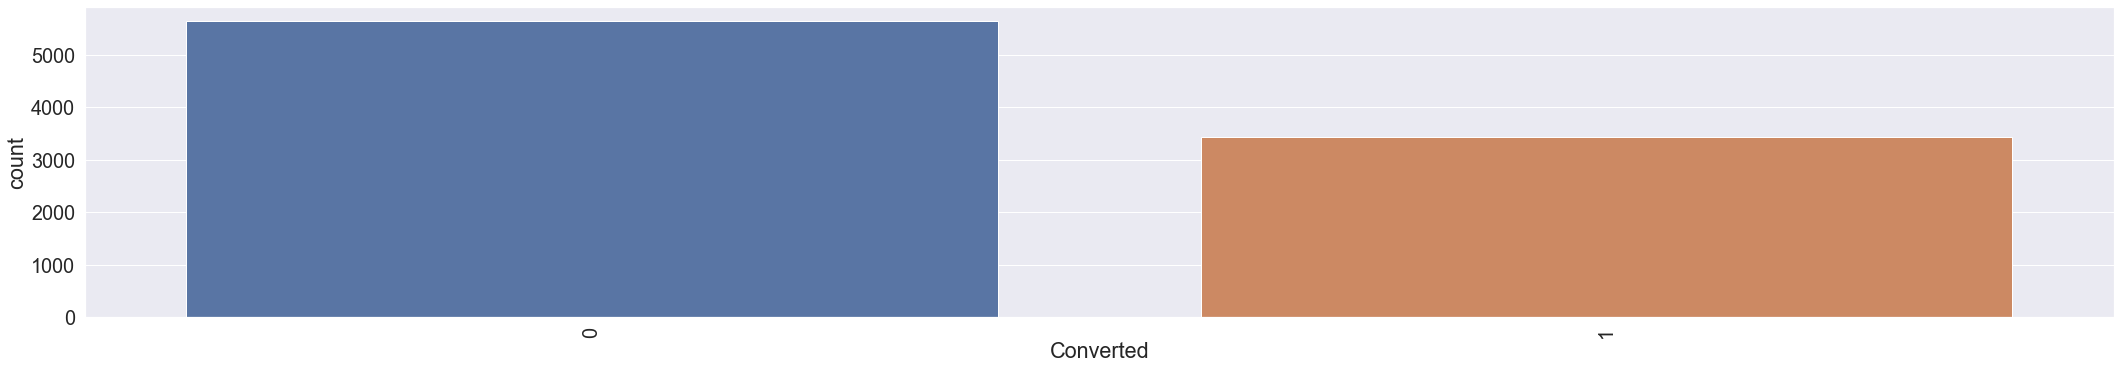

<Figure size 432x288 with 0 Axes>

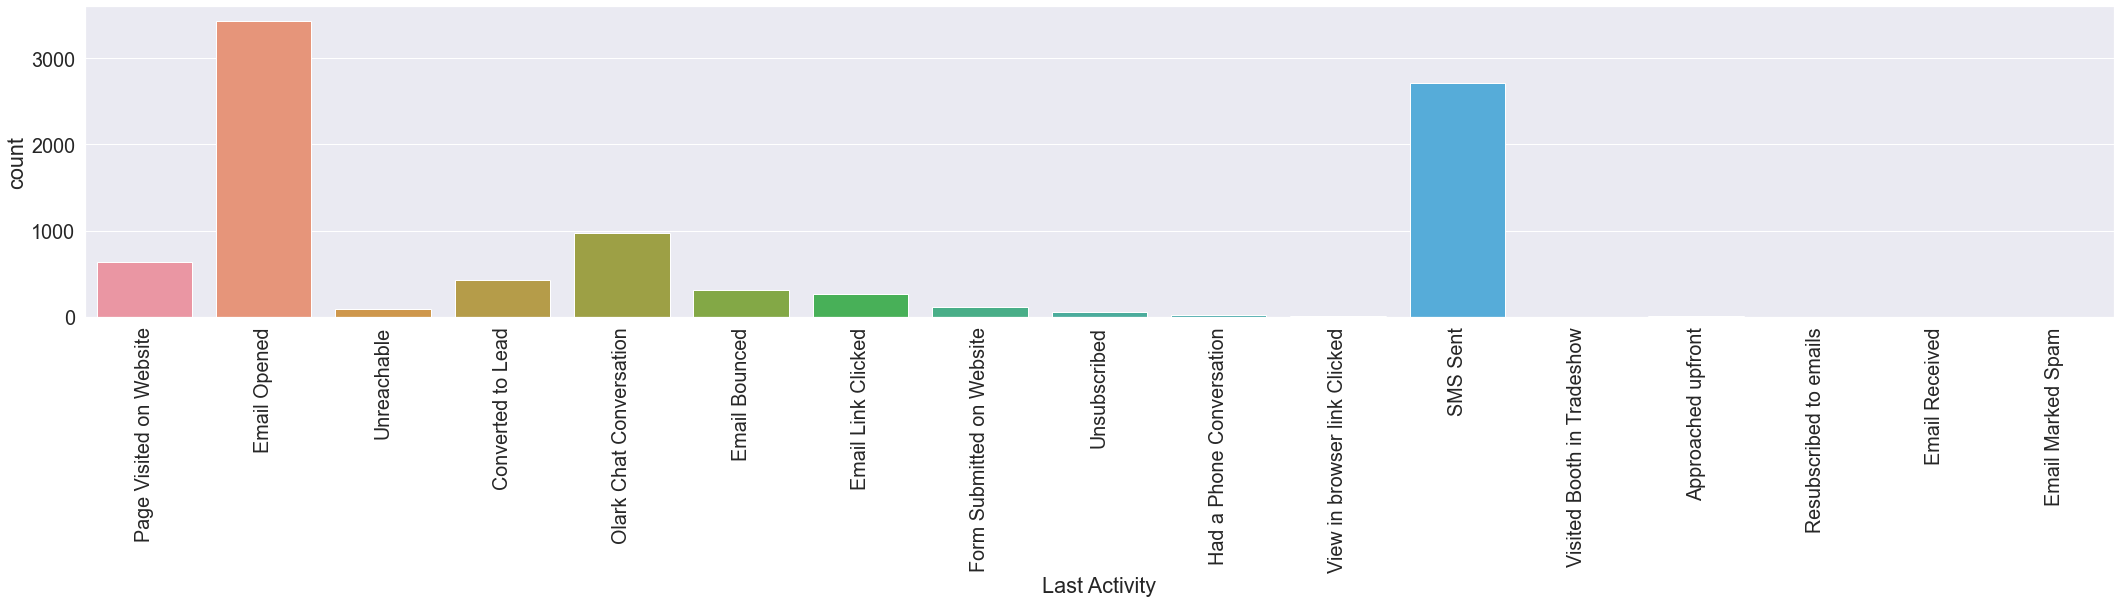

<Figure size 432x288 with 0 Axes>

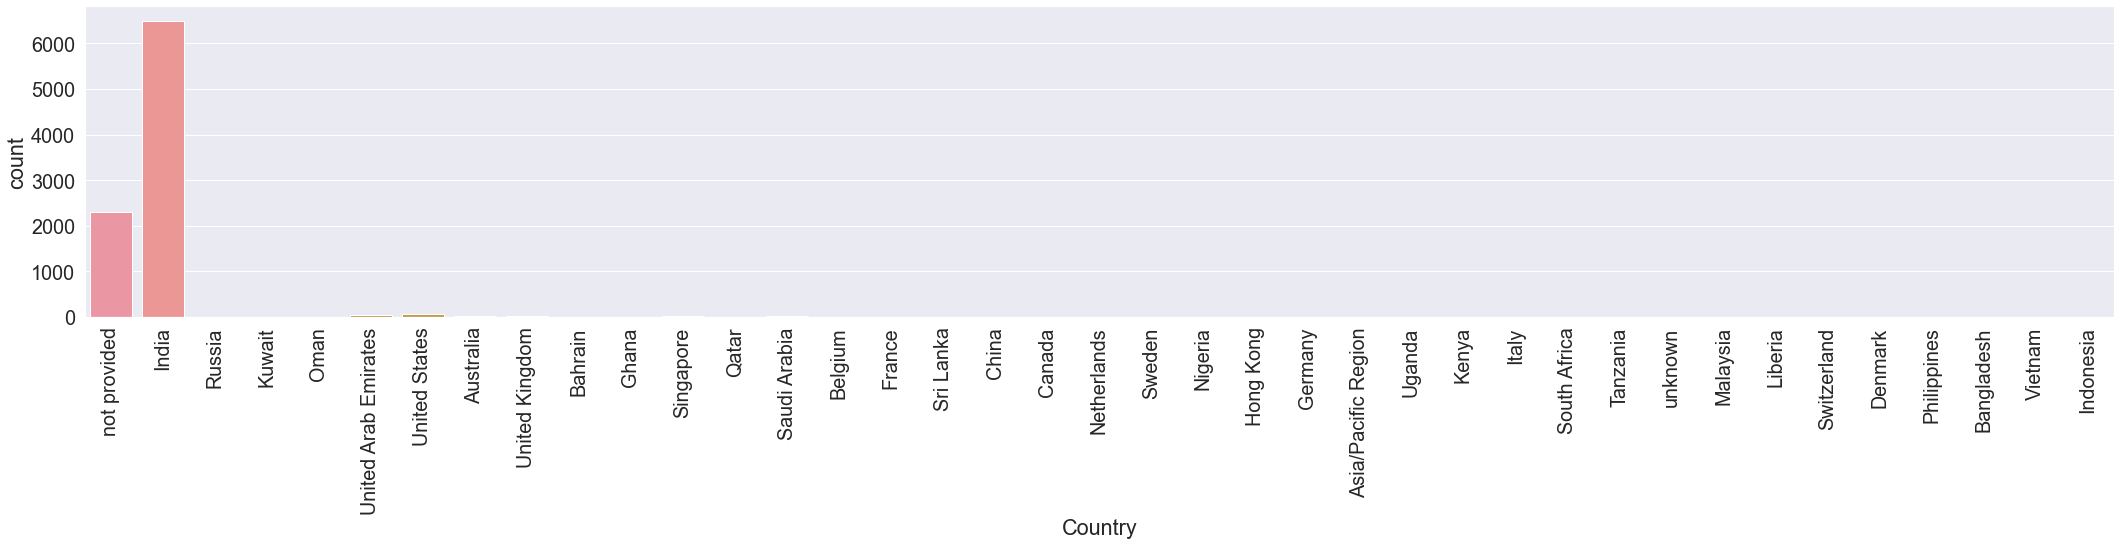

<Figure size 432x288 with 0 Axes>

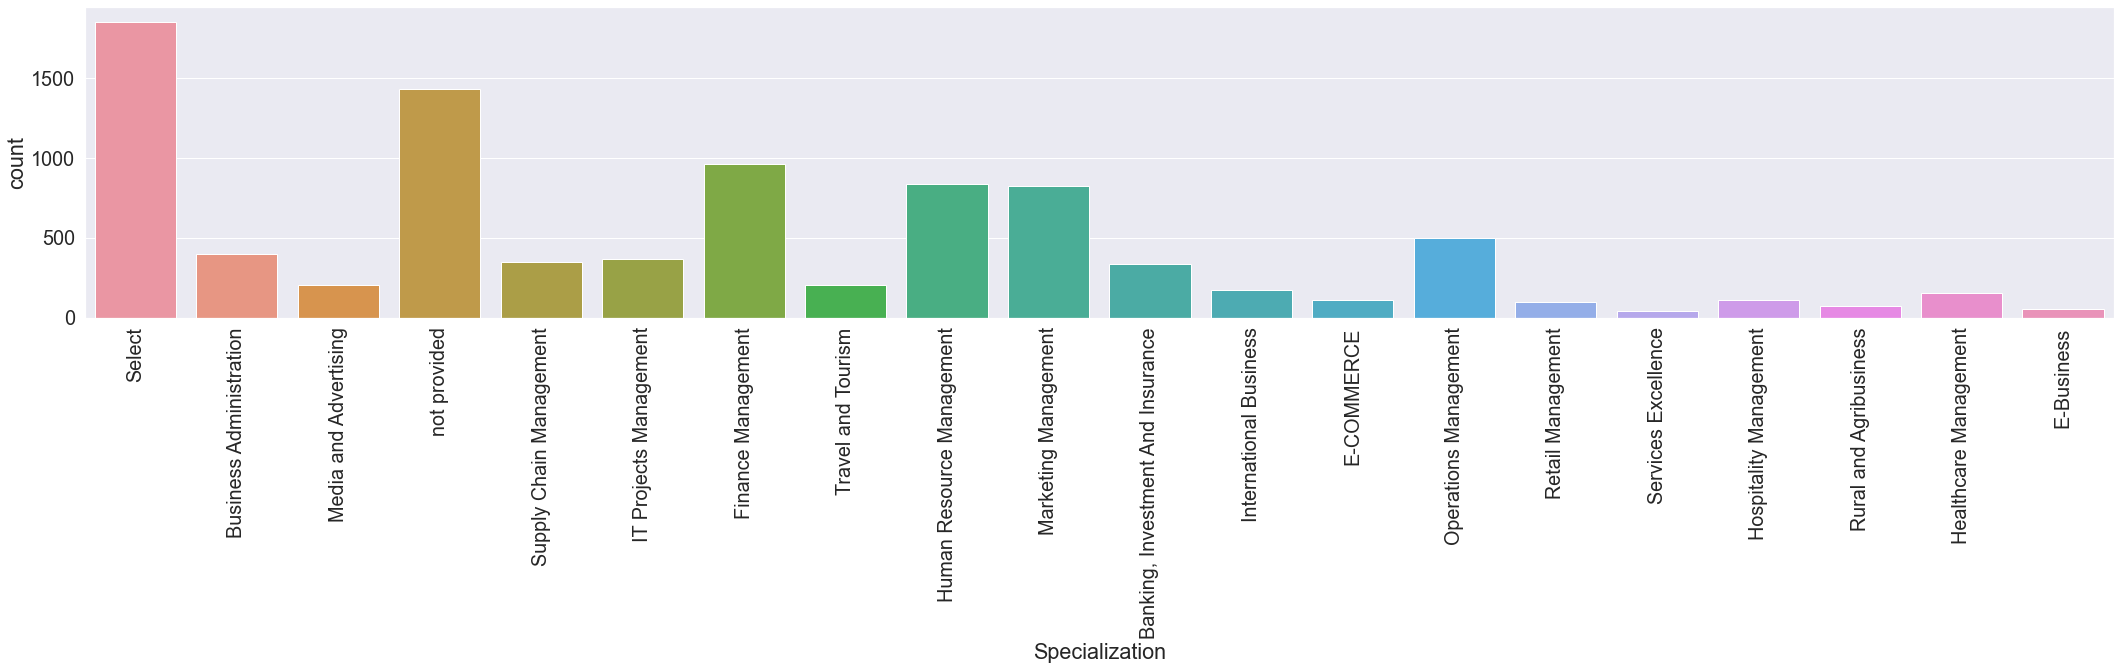

<Figure size 432x288 with 0 Axes>

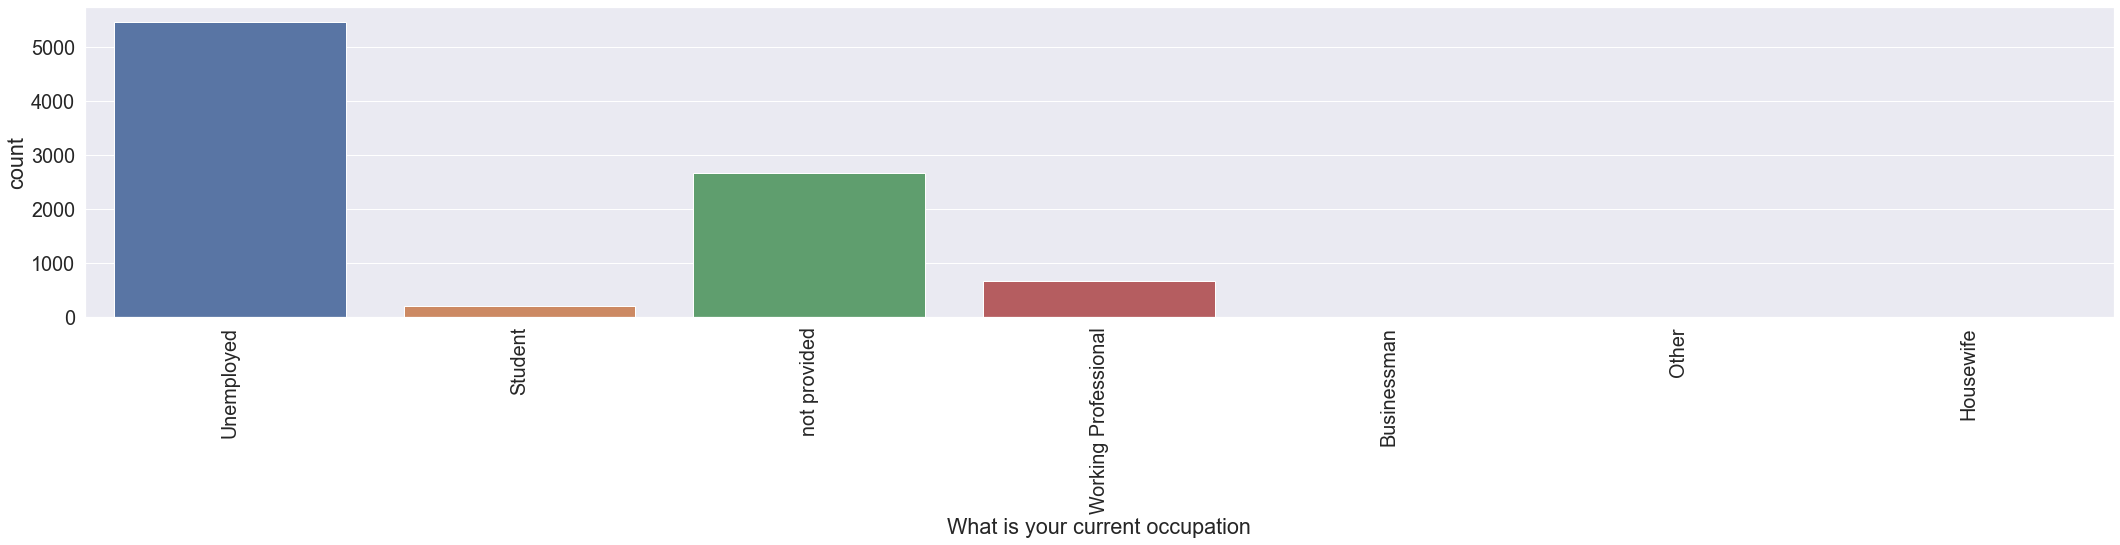

<Figure size 432x288 with 0 Axes>

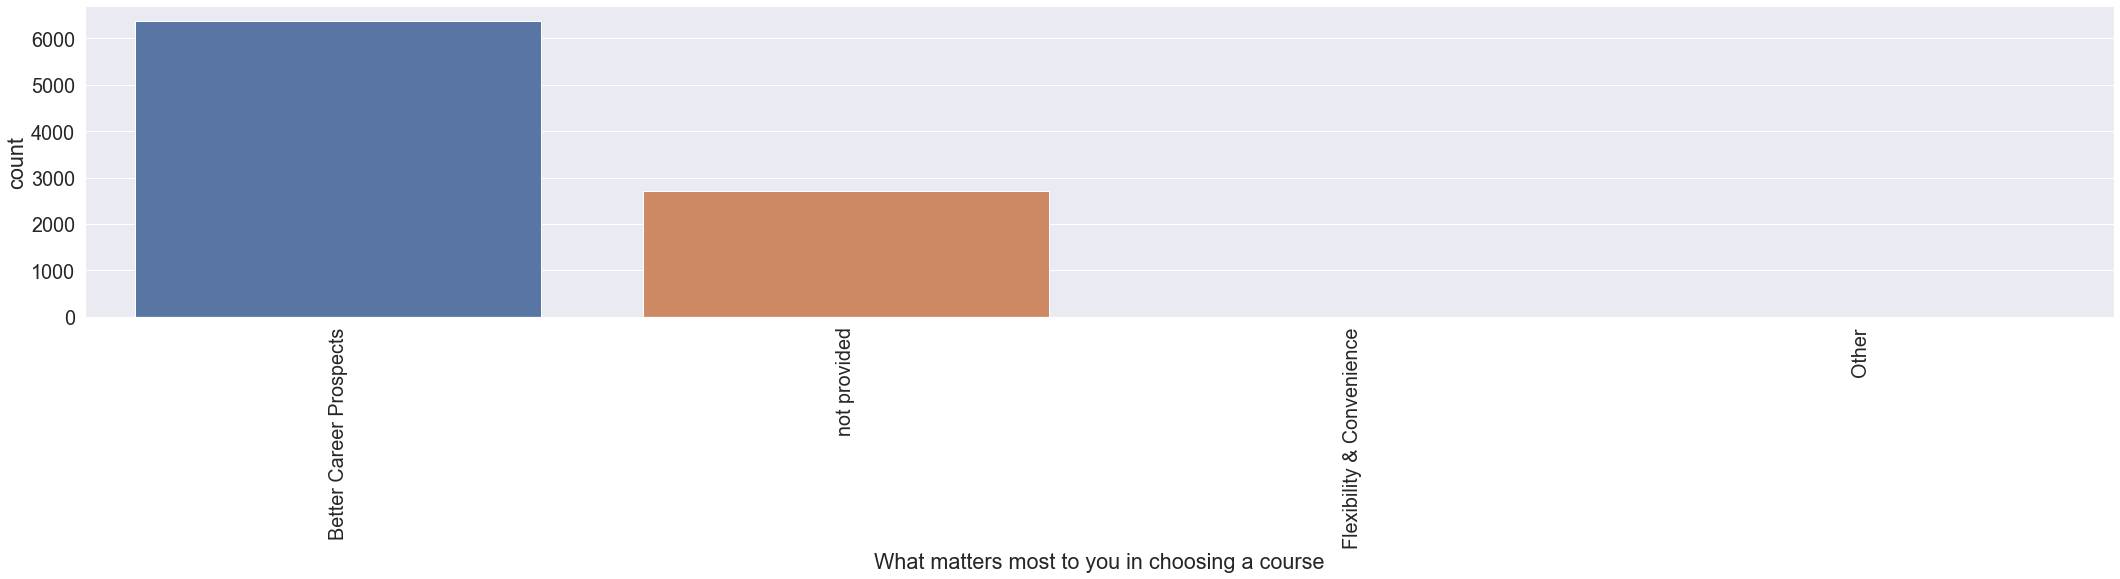

<Figure size 432x288 with 0 Axes>

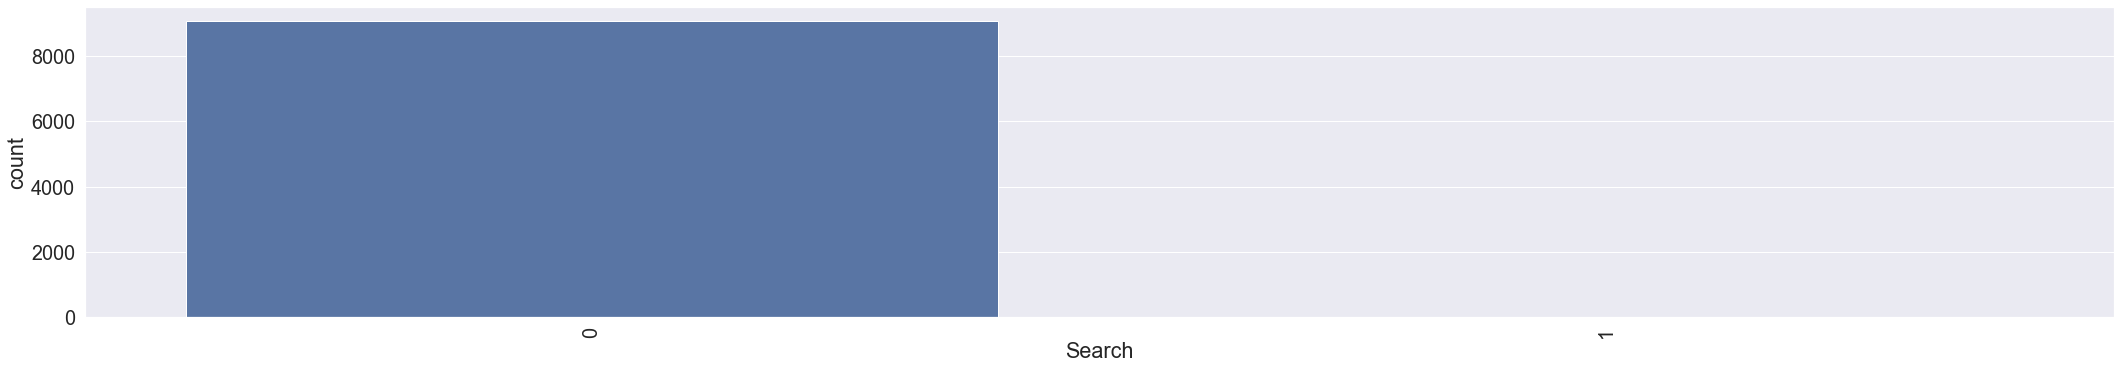

<Figure size 432x288 with 0 Axes>

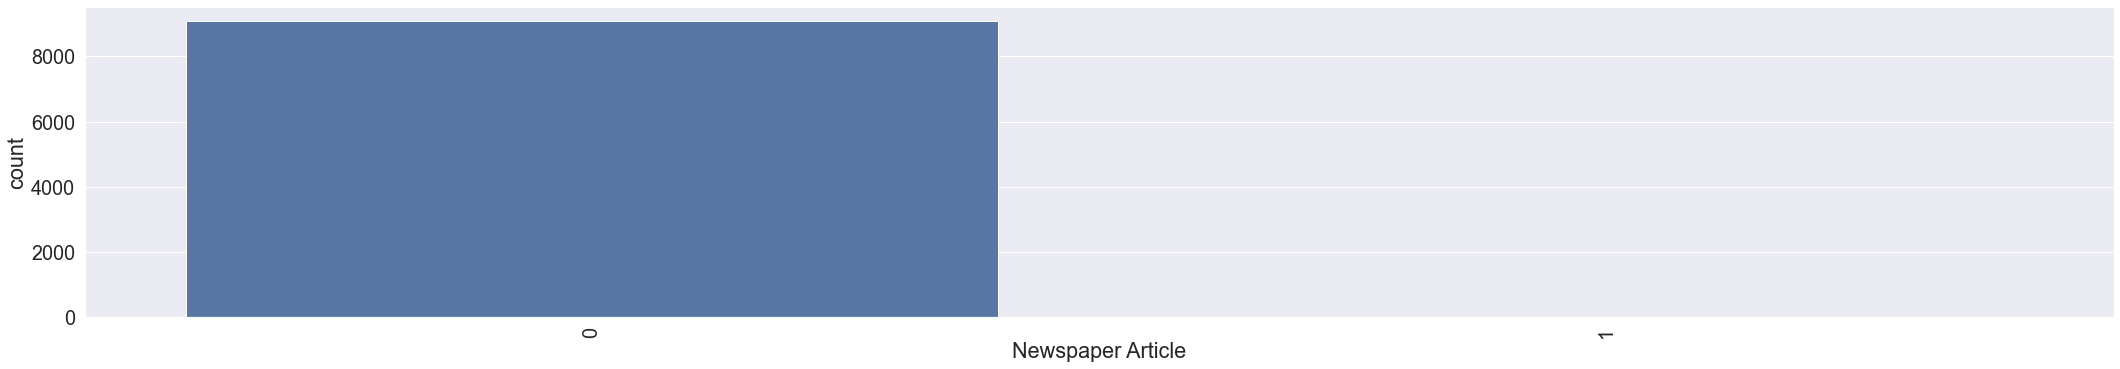

<Figure size 432x288 with 0 Axes>

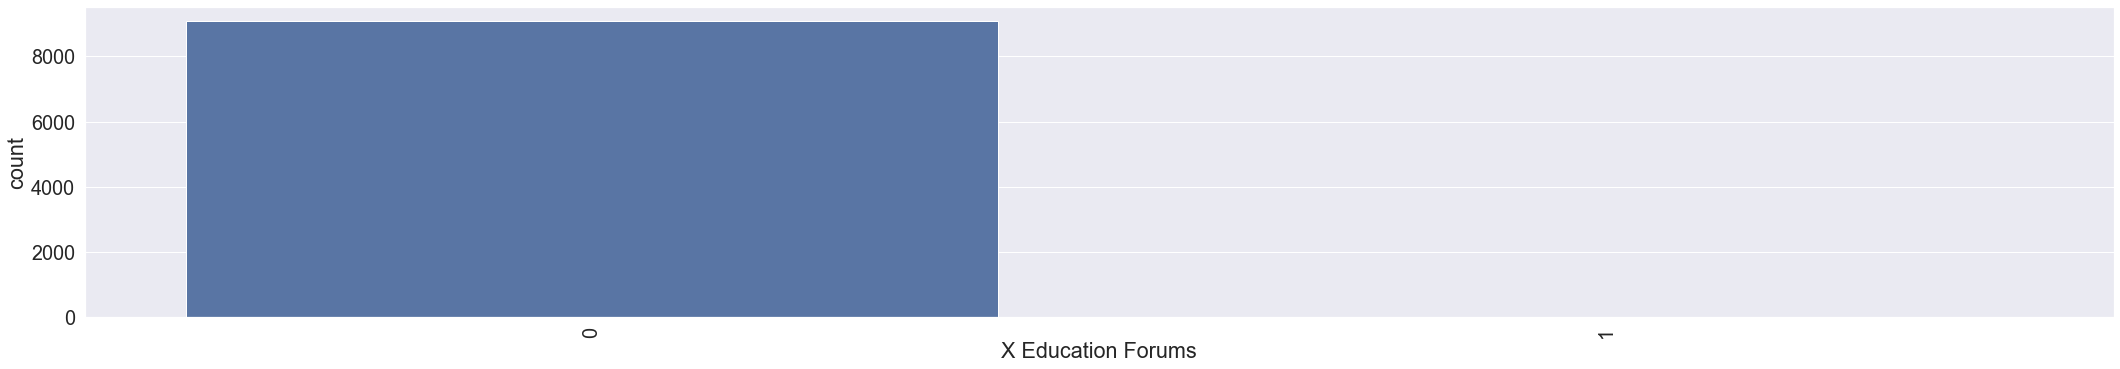

<Figure size 432x288 with 0 Axes>

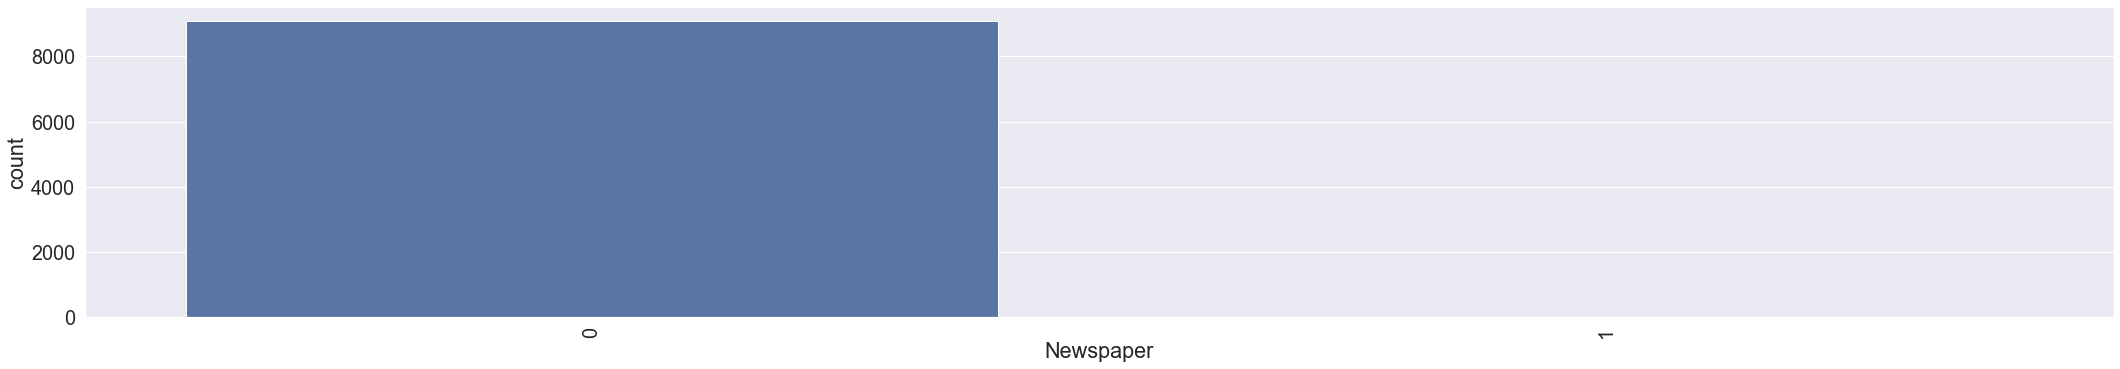

<Figure size 432x288 with 0 Axes>

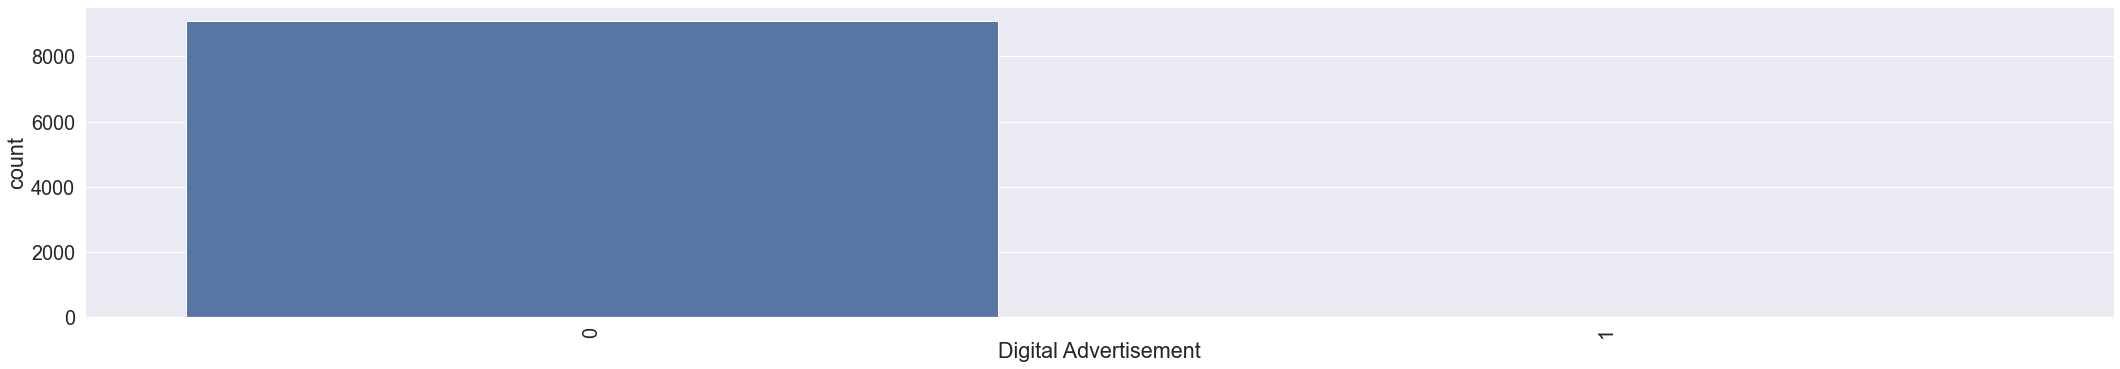

<Figure size 432x288 with 0 Axes>

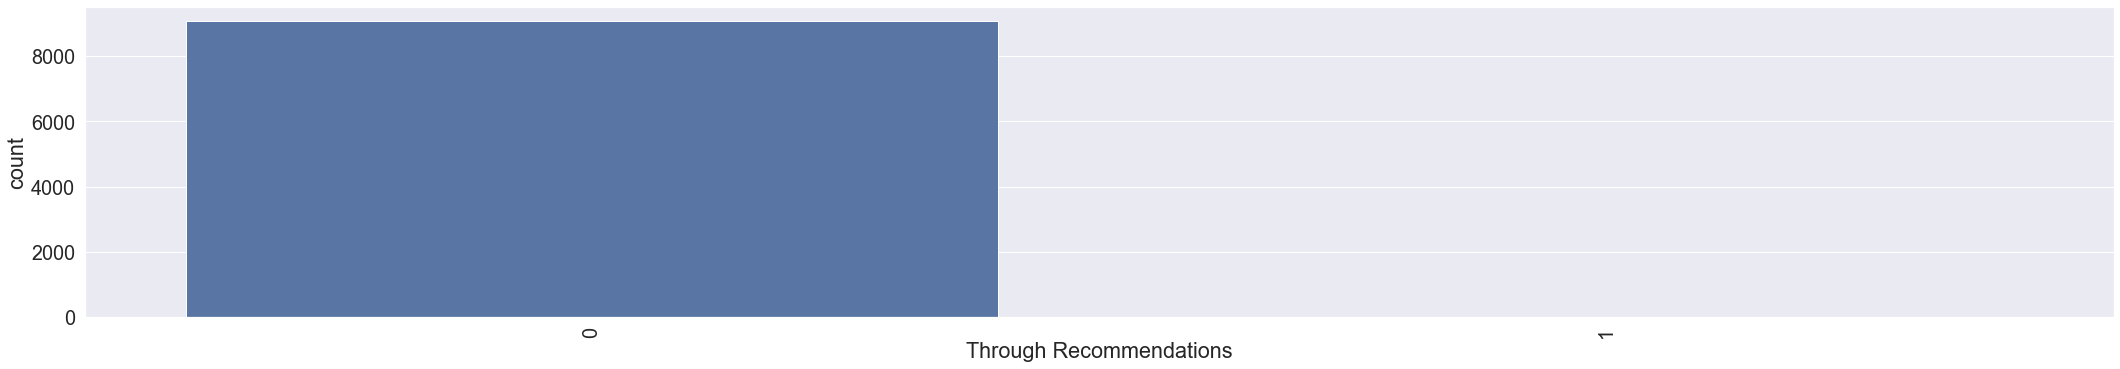

<Figure size 432x288 with 0 Axes>

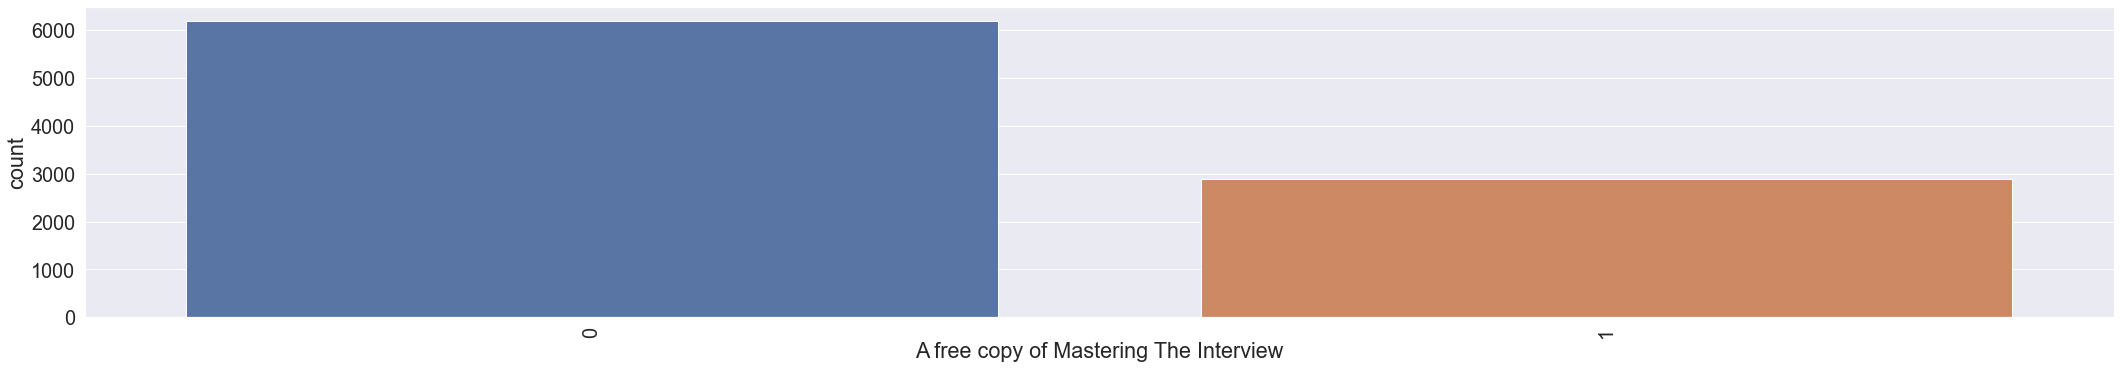

<Figure size 432x288 with 0 Axes>

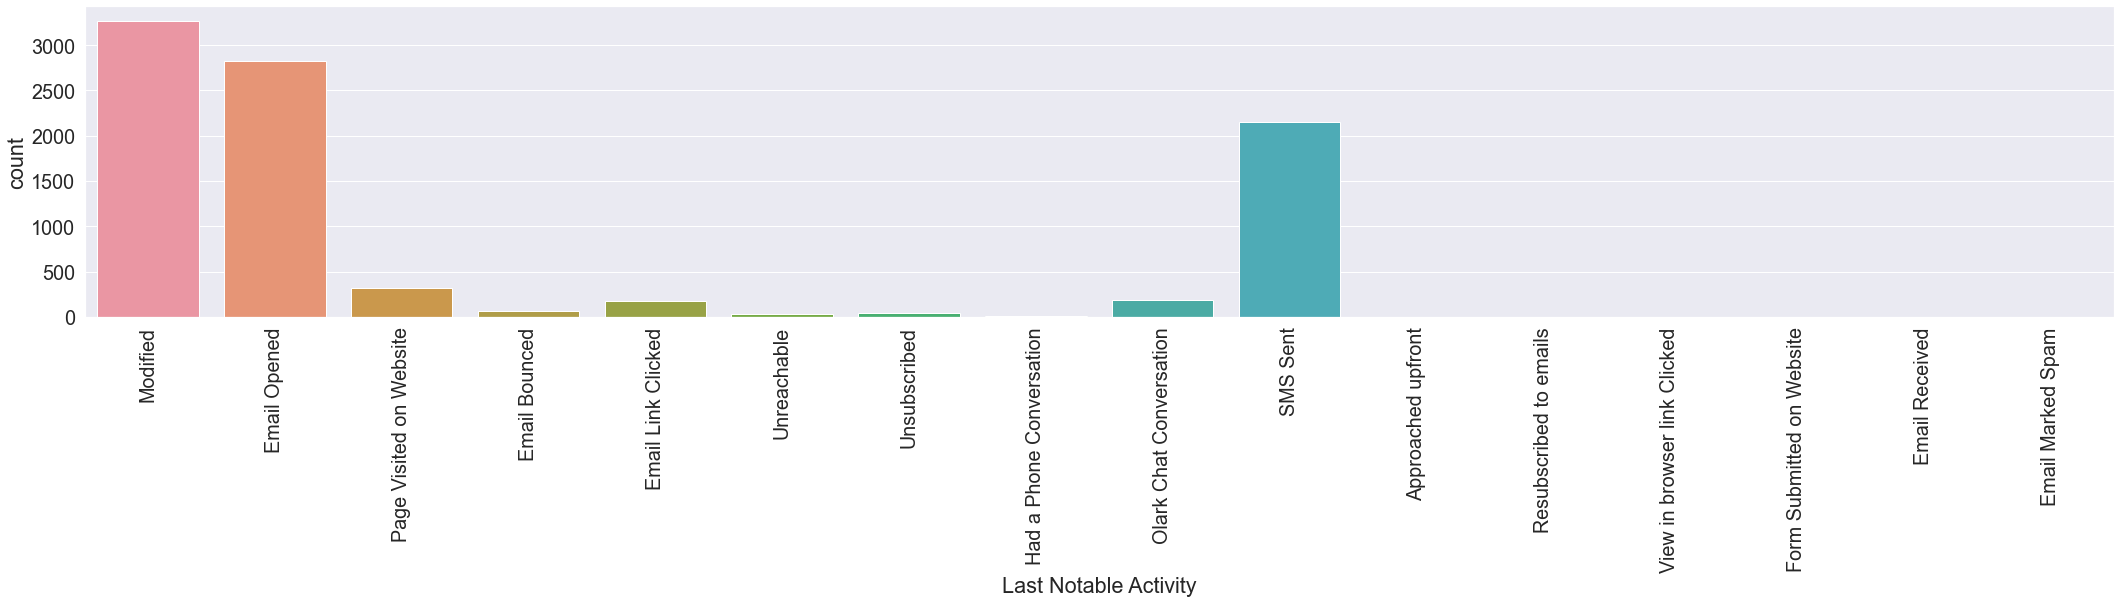

In [33]:
df1 = data.drop(['Prospect ID','TotalVisits','Total Time Spent on Website','Page Views Per Visit'],axis = 1)


df1.columns
for i, col in enumerate(df1.columns):
    plt.figure(i)
    plt.figure(figsize = (80,40))
    plt.subplot(1,2,1)
    sns.set(font_scale=1.8)
    plt.subplot(6,2,3)
    sns.countplot(df1[col])
    plt.xticks(rotation='vertical')
    
    plt.show()

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9074 non-null   object
 1   Lead Source                                    9074 non-null   object
 2   Do Not Email                                   9074 non-null   int64 
 3   Do Not Call                                    9074 non-null   int64 
 4   Converted                                      9074 non-null   int64 
 5   Last Activity                                  9074 non-null   object
 6   Country                                        9074 non-null   object
 7   Specialization                                 9074 non-null   object
 8   What is your current occupation                9074 non-null   object
 9   What matters most to you in choosing a course  9074 non-null   

<Figure size 432x288 with 0 Axes>

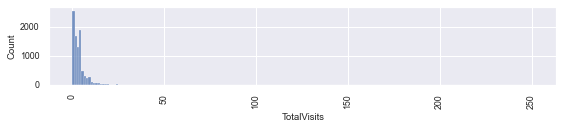

<Figure size 432x288 with 0 Axes>

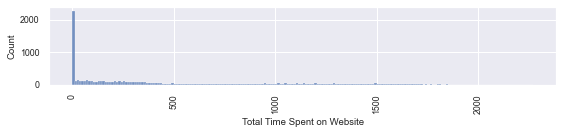

<Figure size 432x288 with 0 Axes>

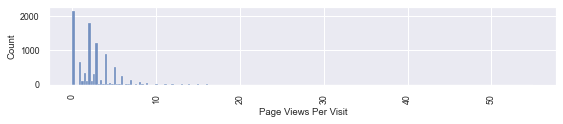

In [35]:
df1 = data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
for i, col in enumerate(df1.columns):
    plt.figure(i)
    plt.figure(figsize = (20,10))
    plt.subplot(1,2,1)
    sns.set(font_scale=.8)
    plt.subplot(6,2,3)
    sns.histplot(df1[col],bins = 200)
    plt.xticks(rotation='vertical')
    
    plt.show()

## Bivariate Analysis

<Figure size 432x288 with 0 Axes>

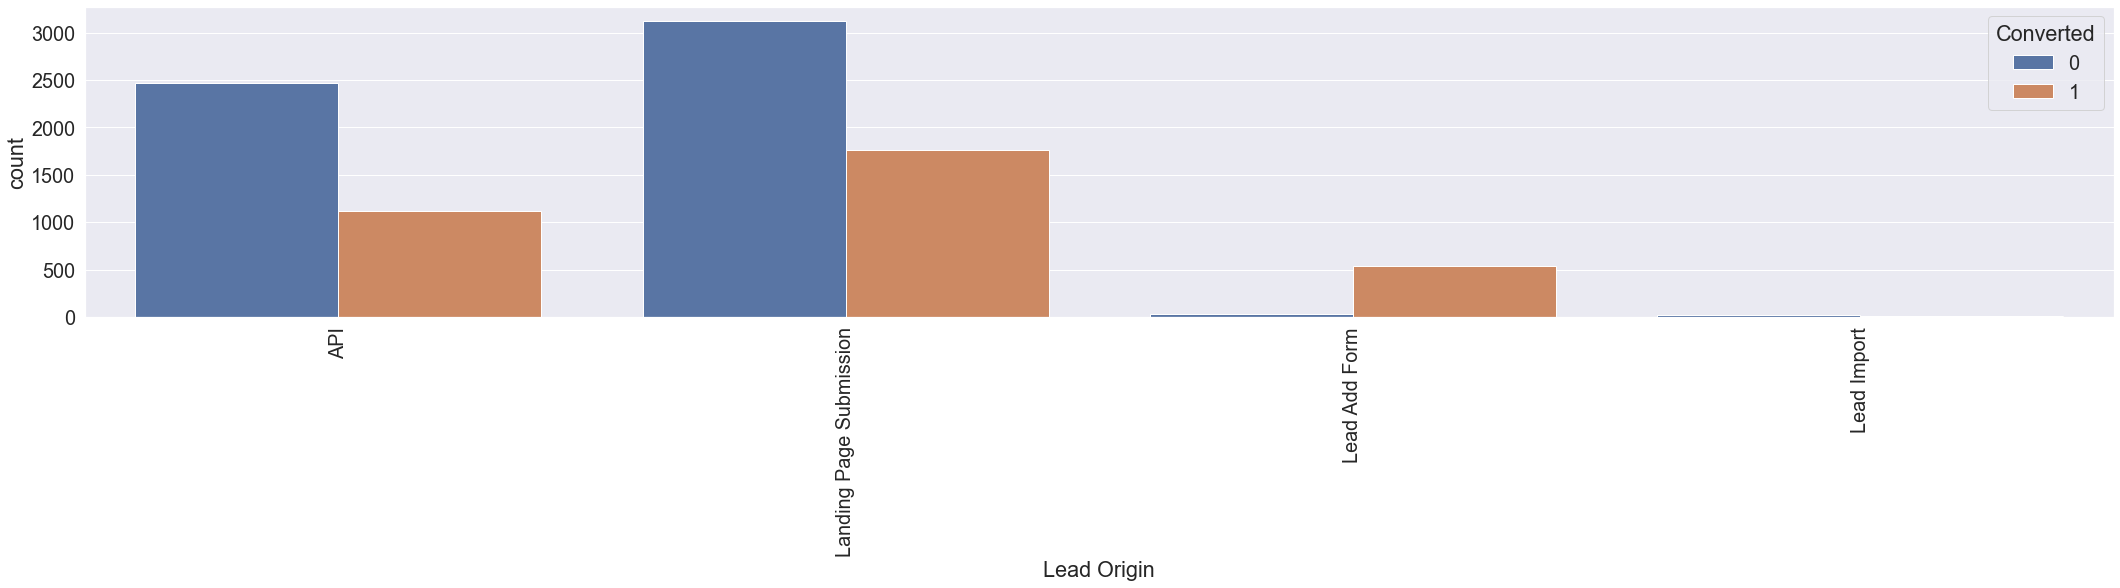

<Figure size 432x288 with 0 Axes>

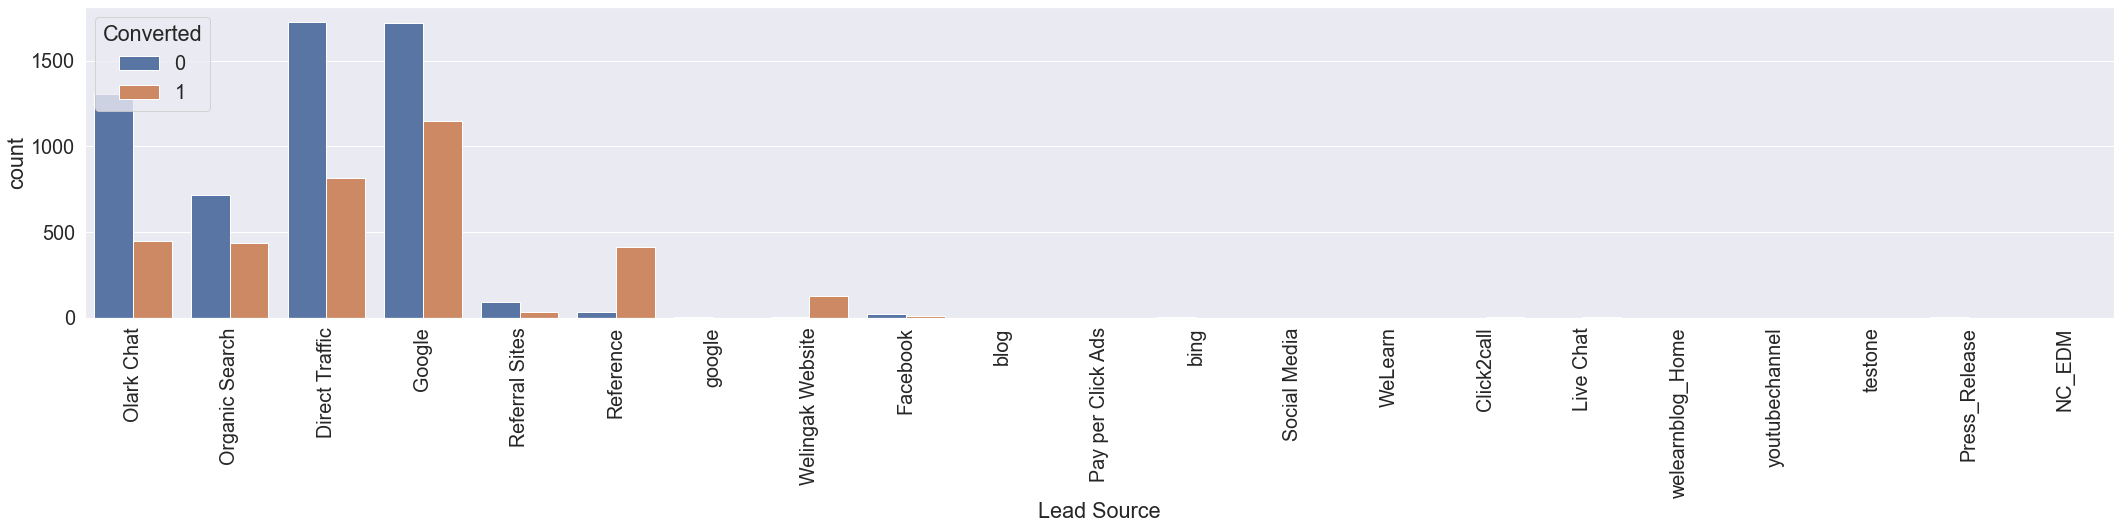

<Figure size 432x288 with 0 Axes>

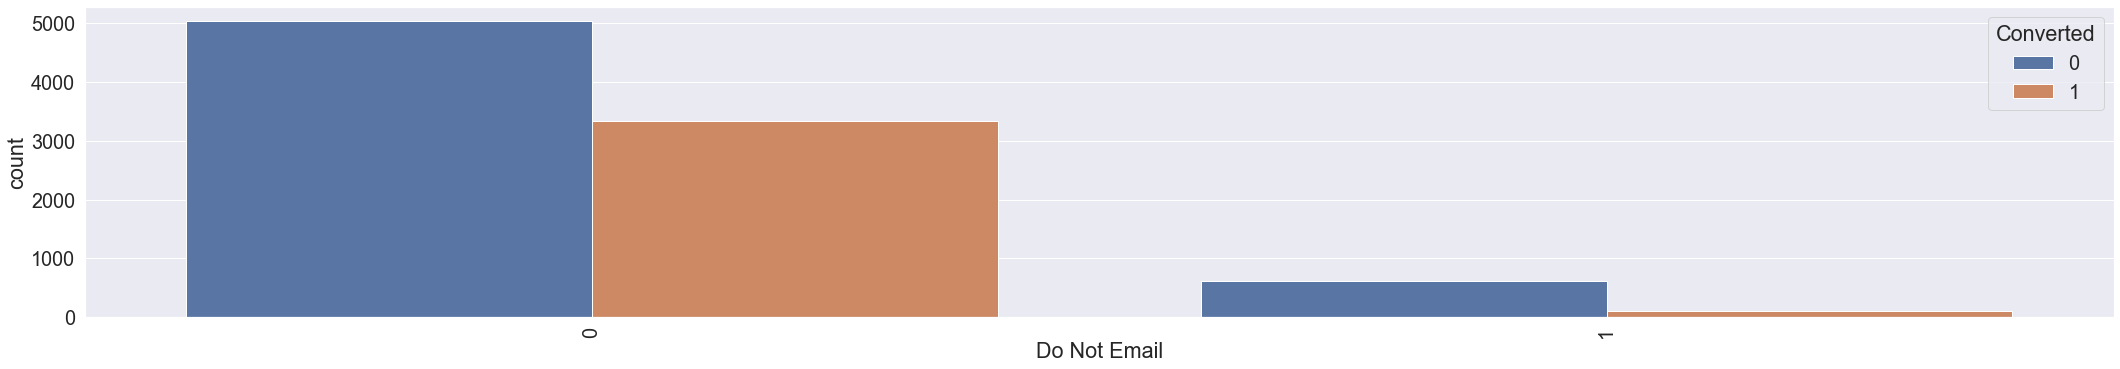

<Figure size 432x288 with 0 Axes>

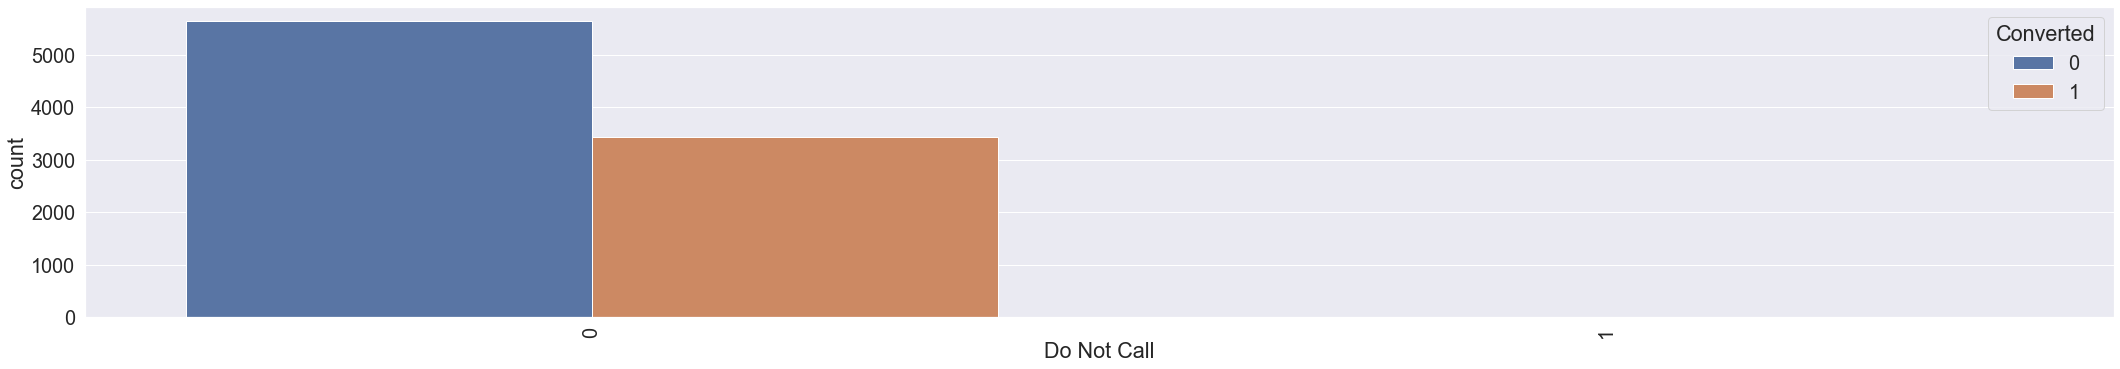

<Figure size 432x288 with 0 Axes>

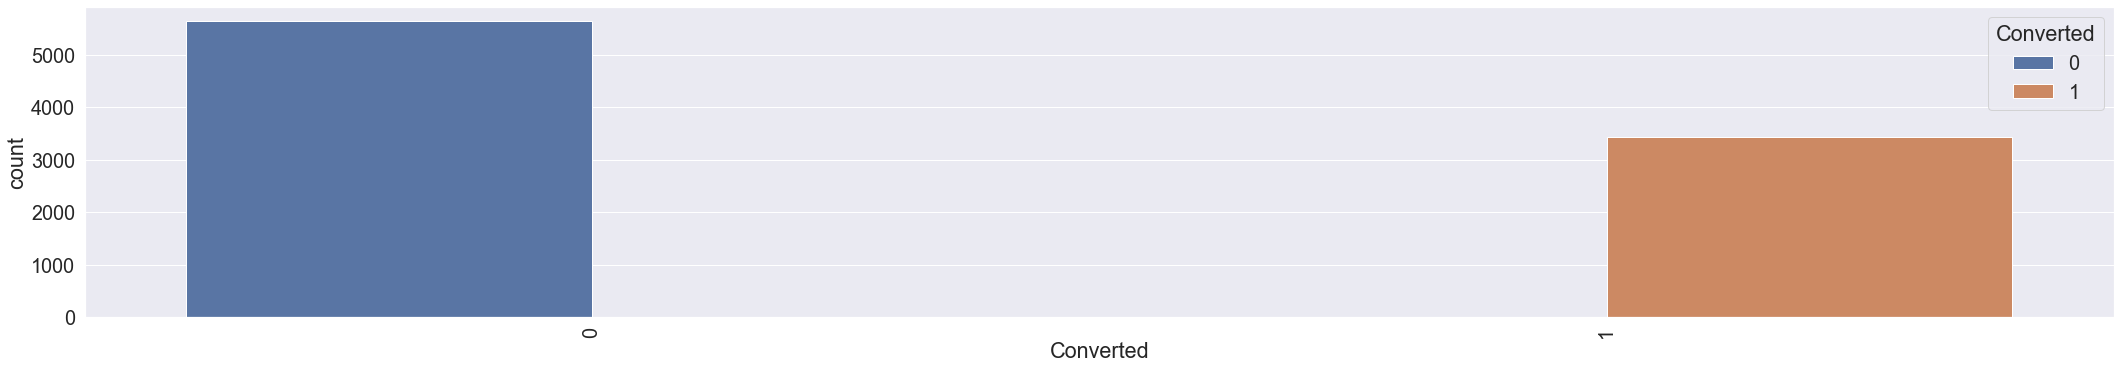

<Figure size 432x288 with 0 Axes>

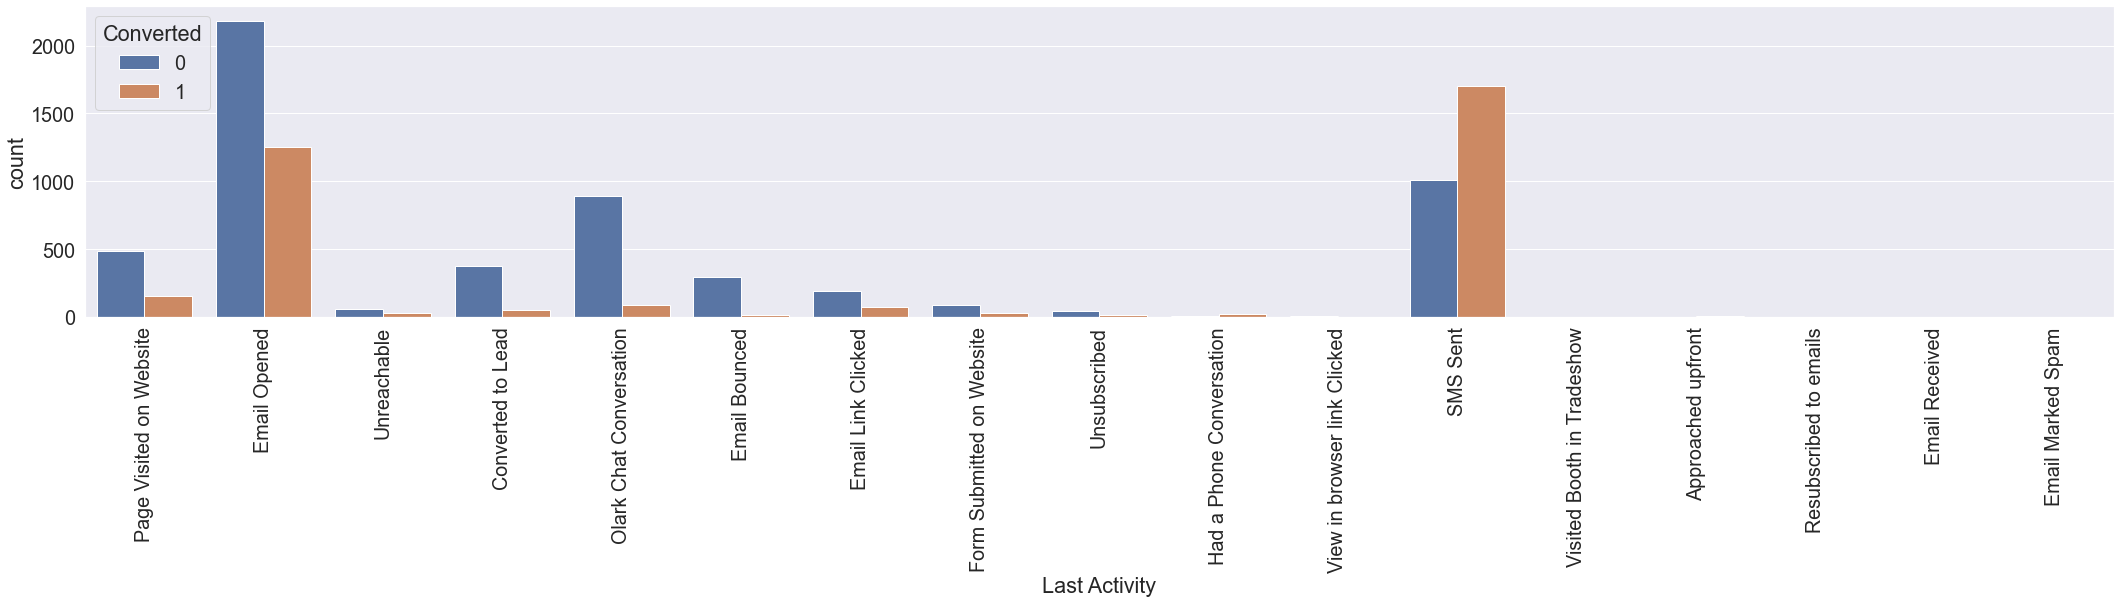

<Figure size 432x288 with 0 Axes>

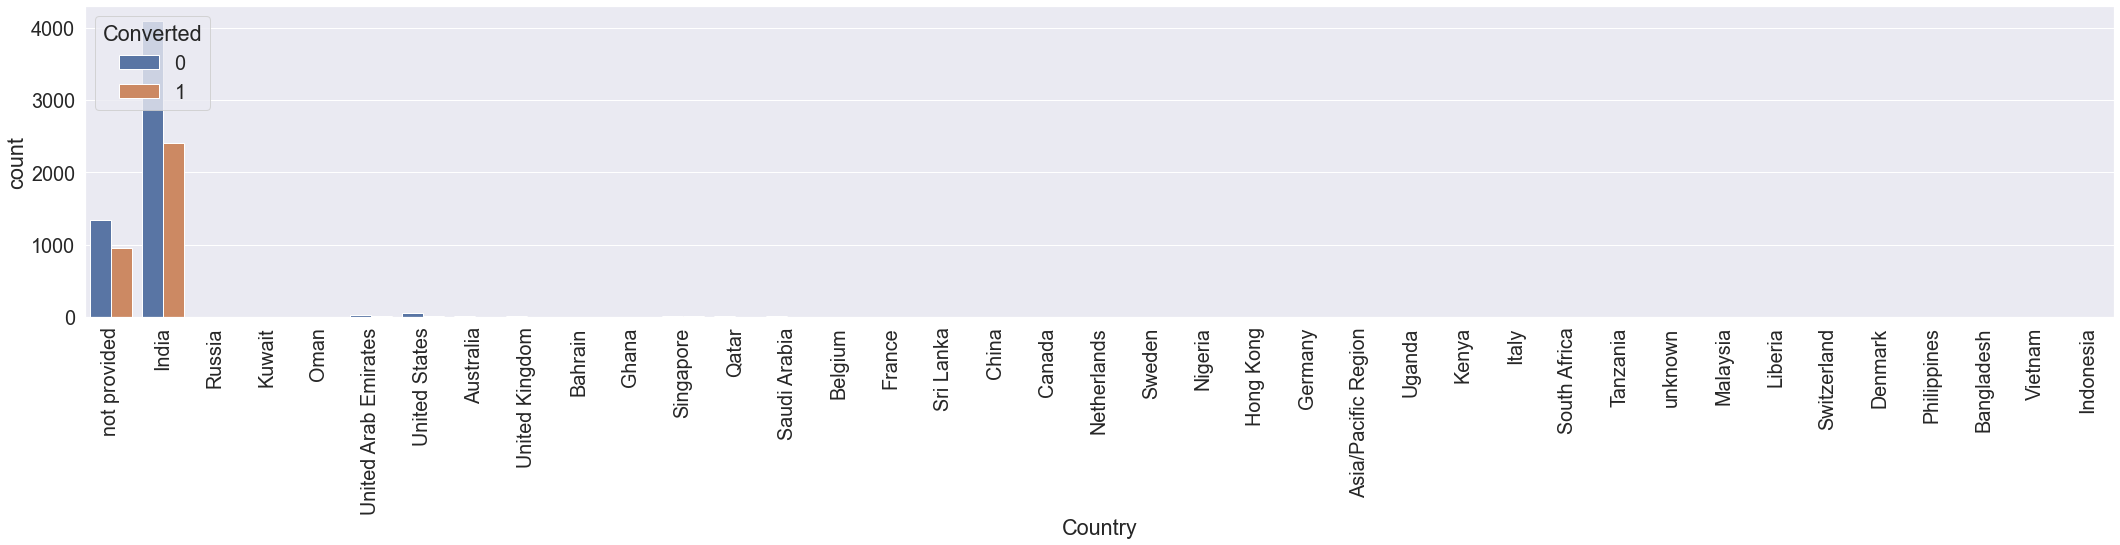

<Figure size 432x288 with 0 Axes>

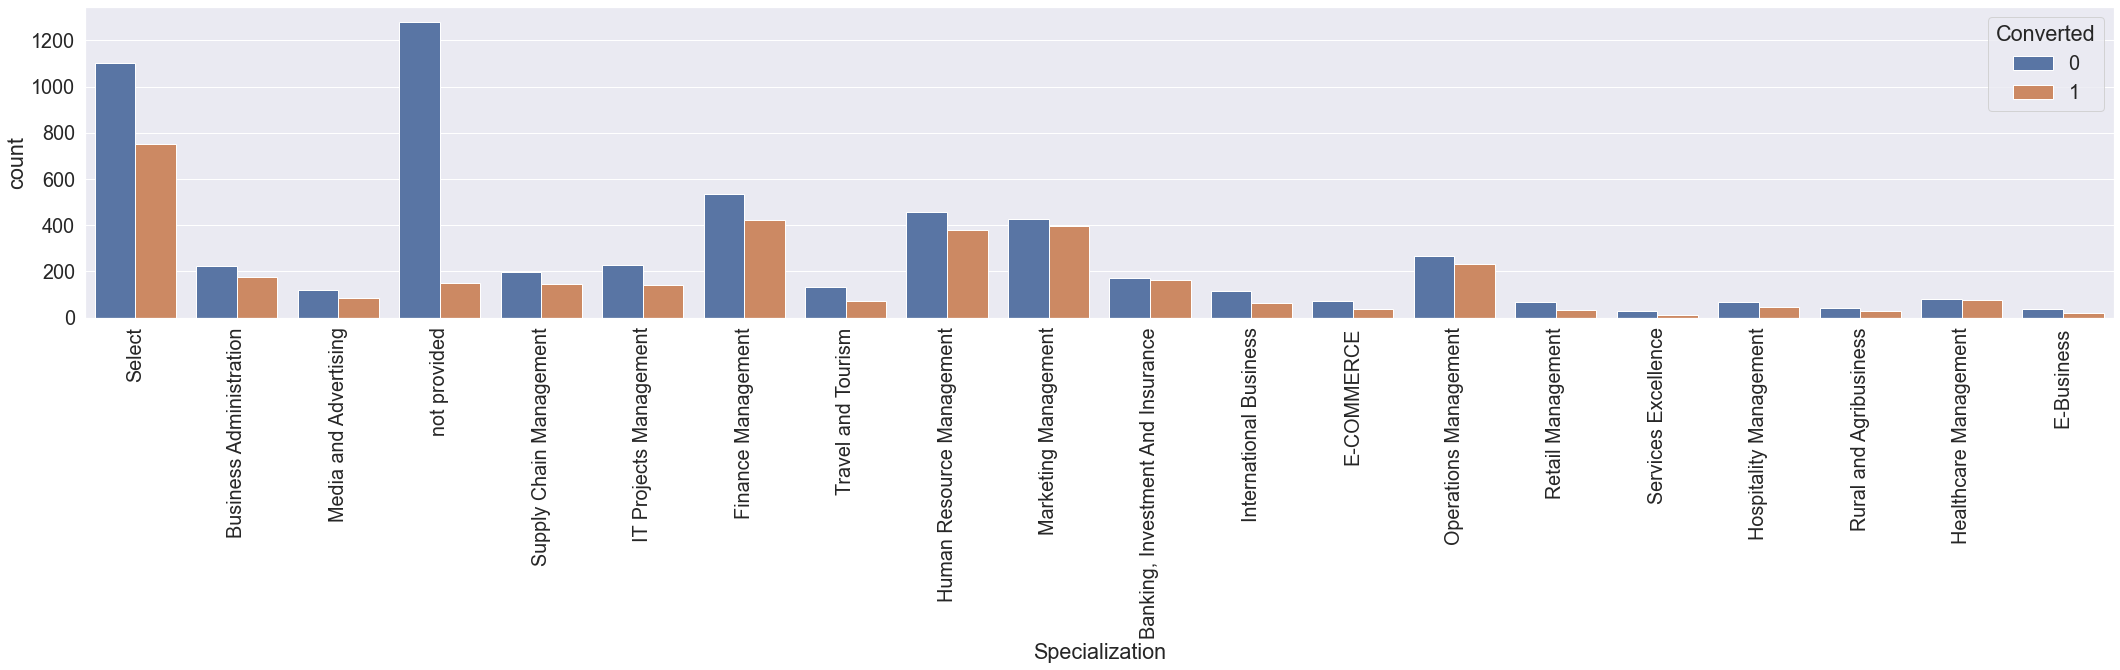

<Figure size 432x288 with 0 Axes>

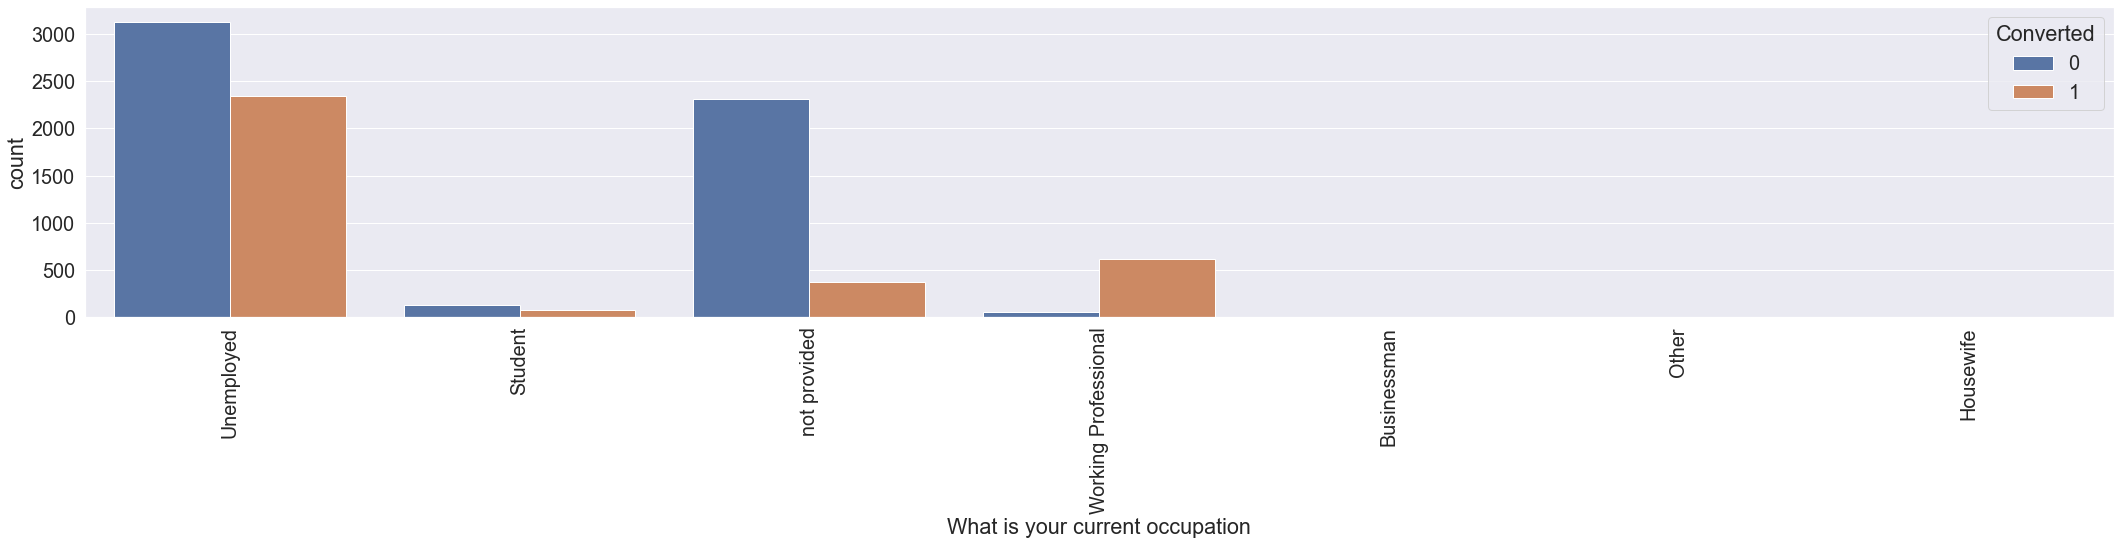

<Figure size 432x288 with 0 Axes>

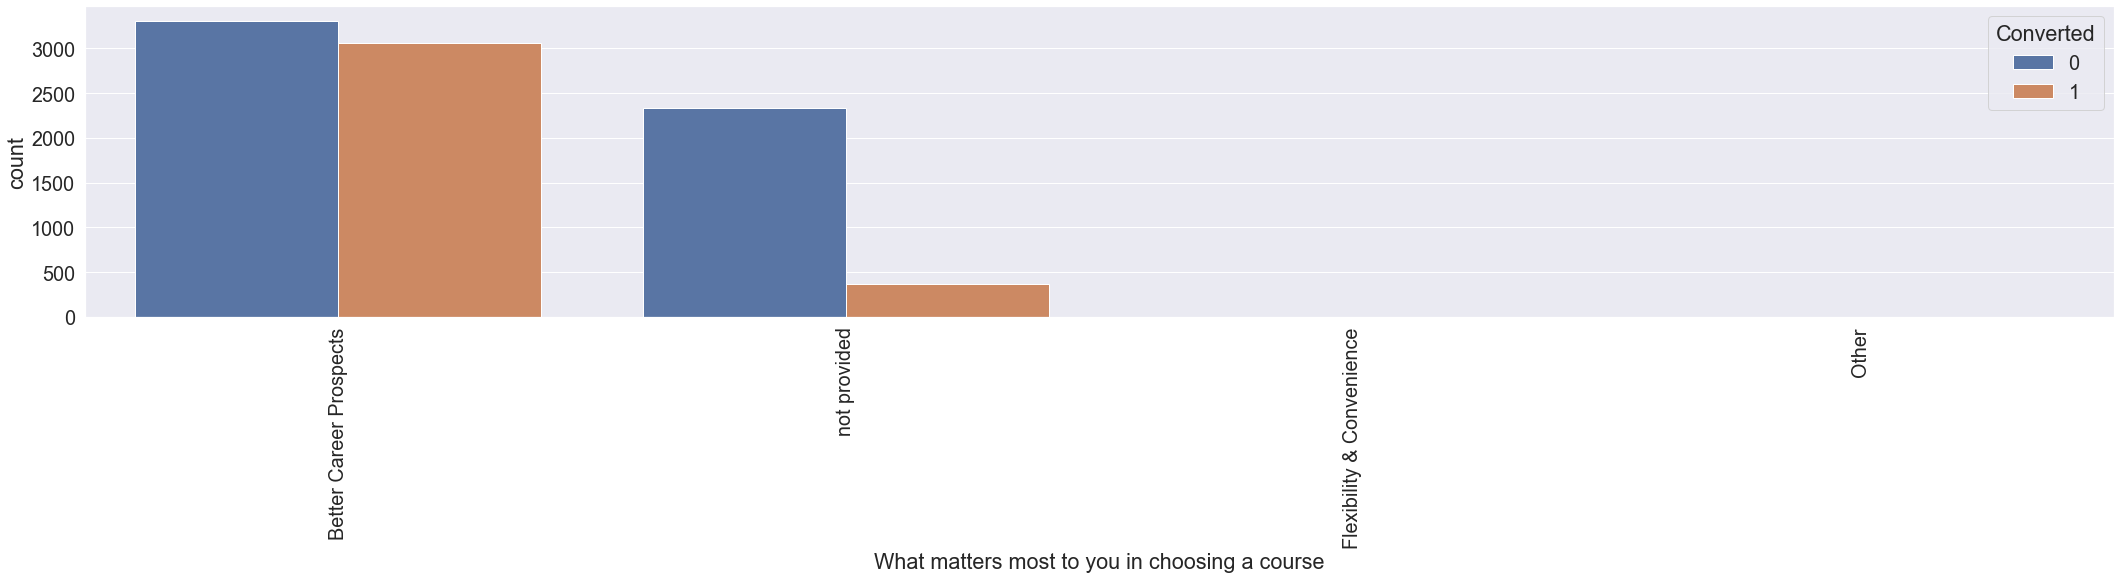

<Figure size 432x288 with 0 Axes>

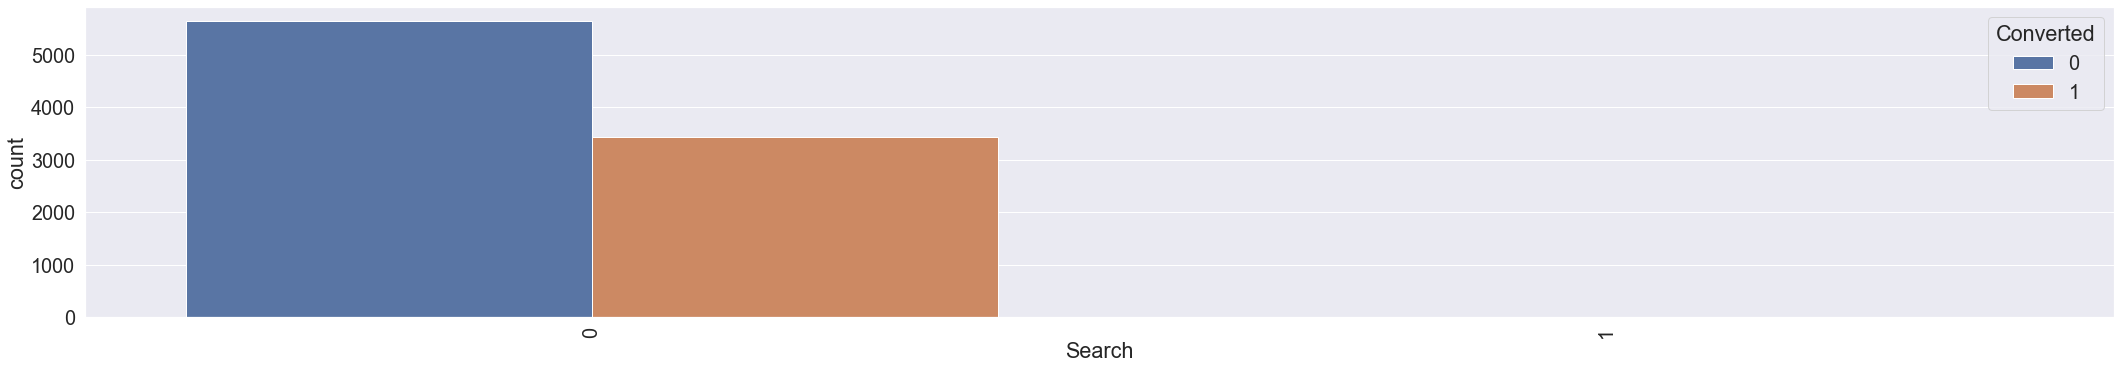

<Figure size 432x288 with 0 Axes>

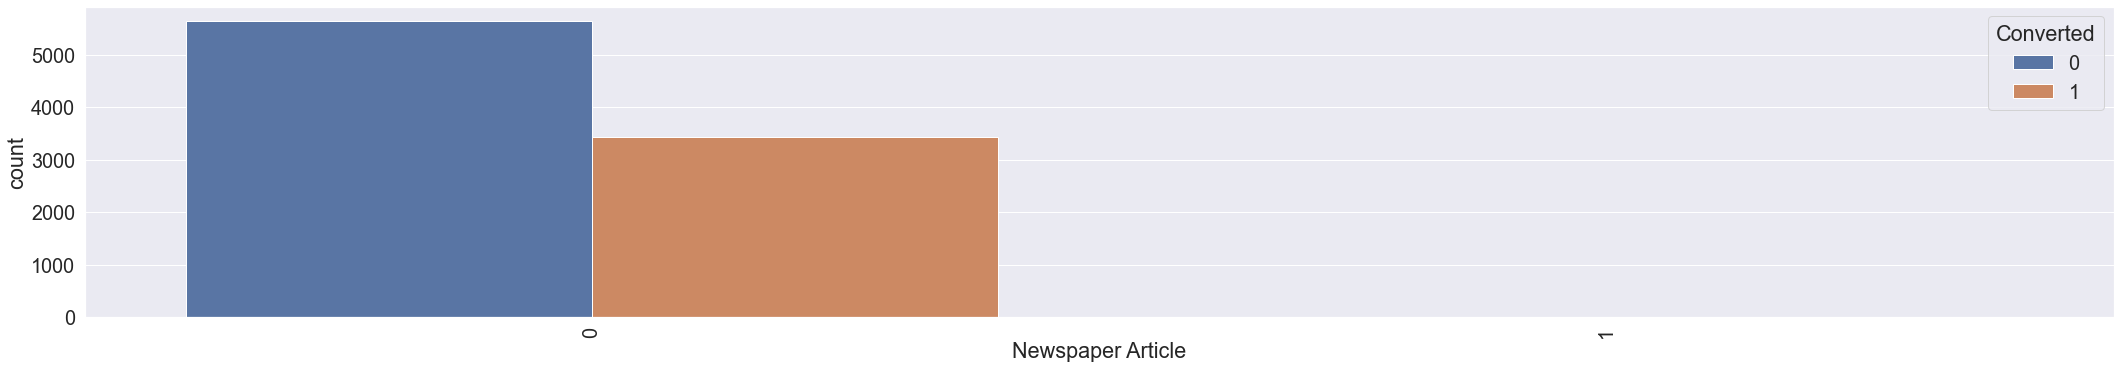

<Figure size 432x288 with 0 Axes>

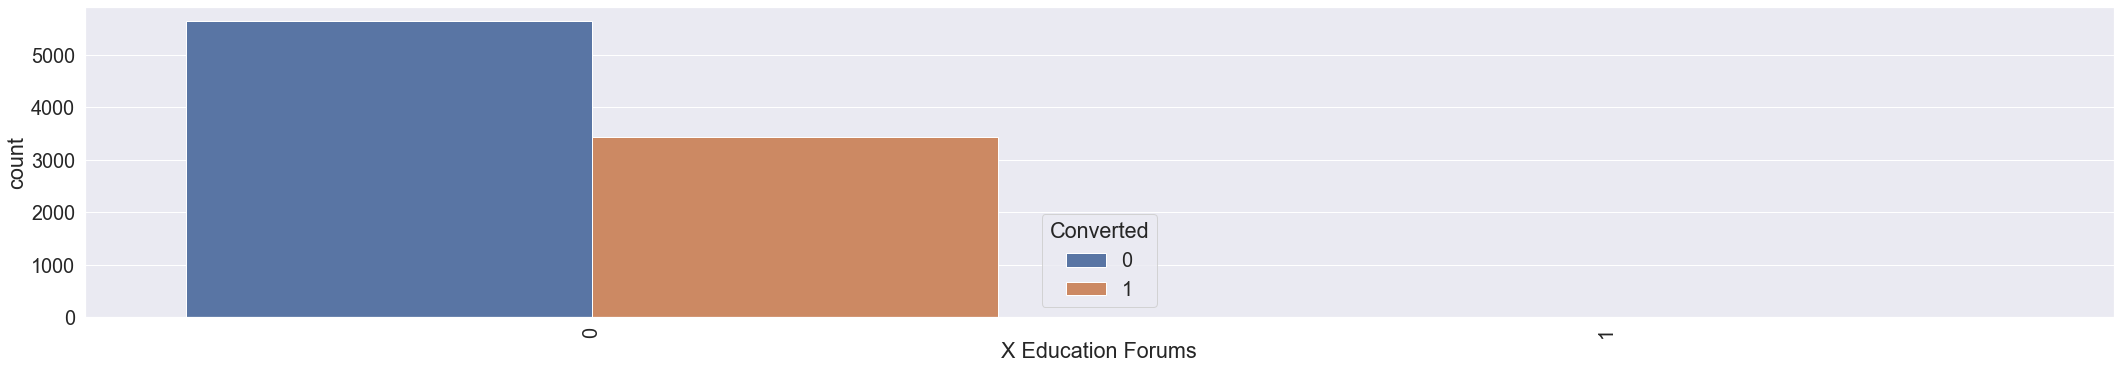

<Figure size 432x288 with 0 Axes>

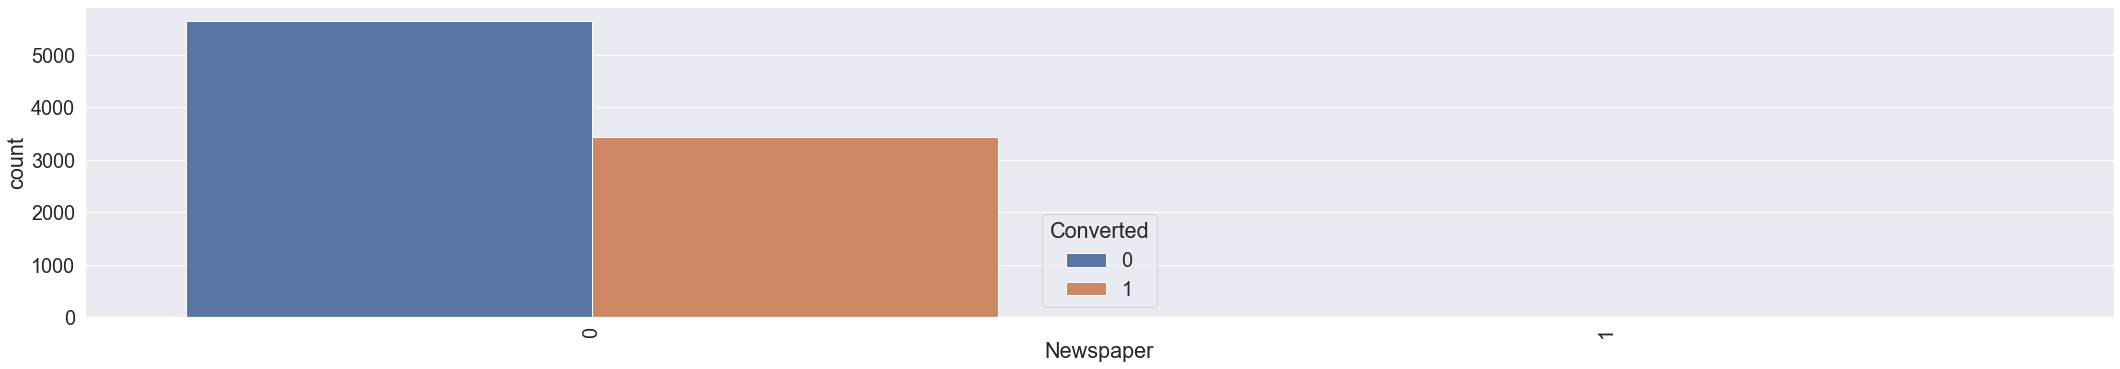

<Figure size 432x288 with 0 Axes>

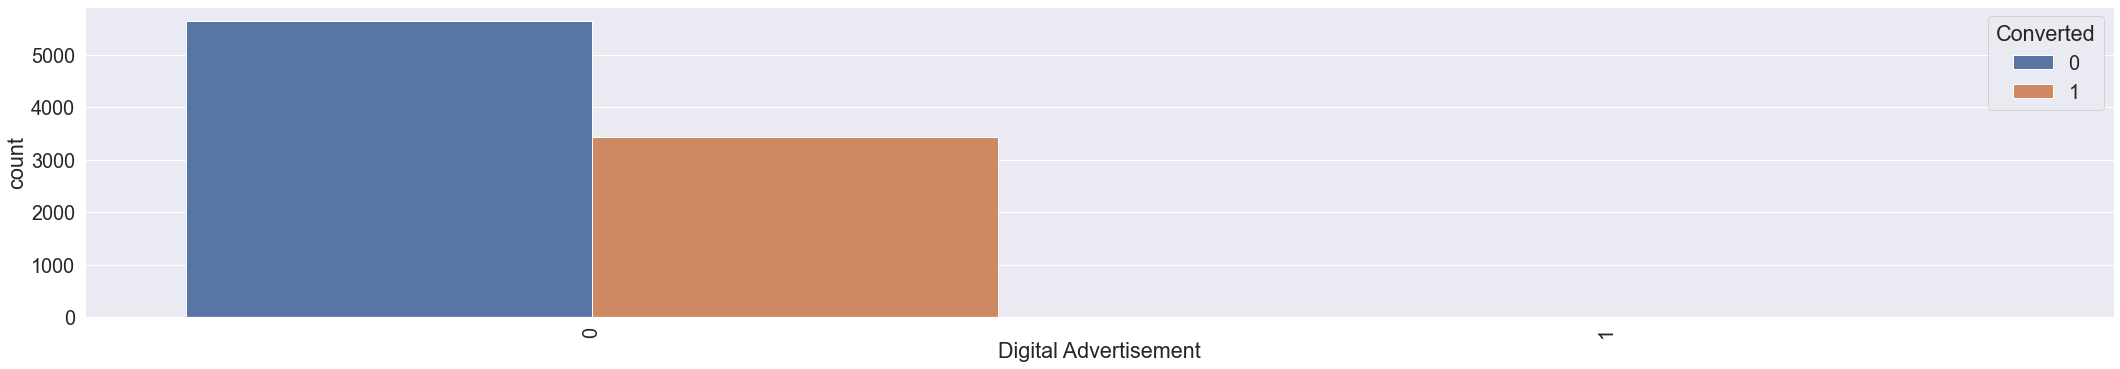

<Figure size 432x288 with 0 Axes>

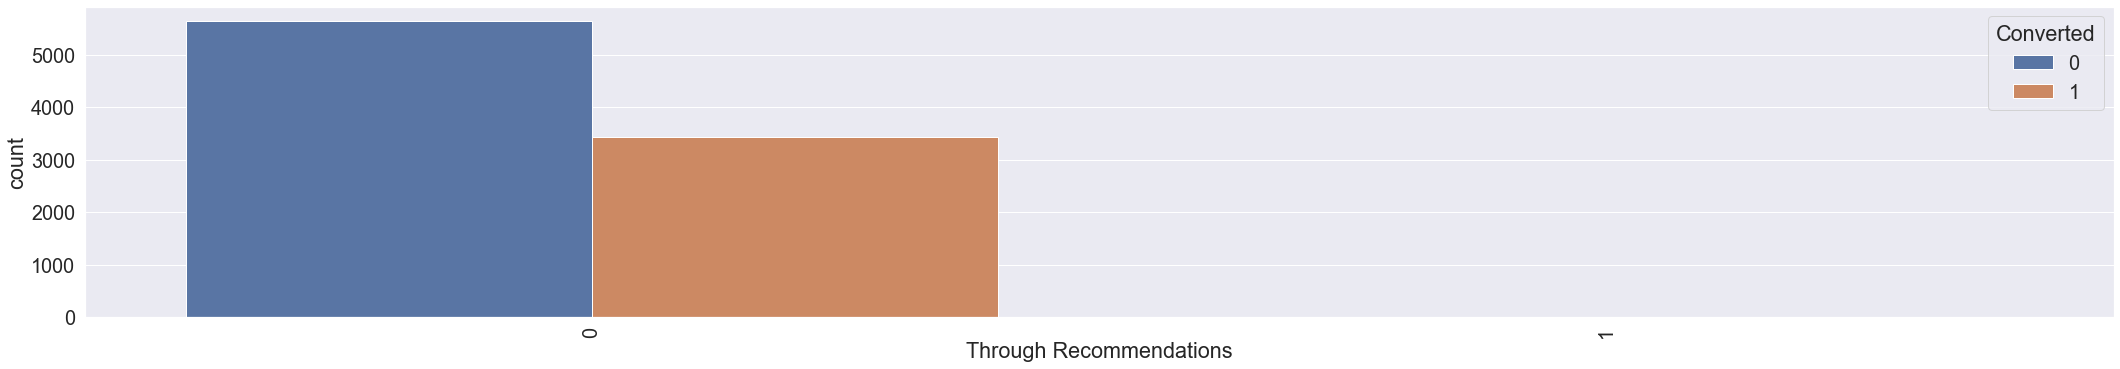

<Figure size 432x288 with 0 Axes>

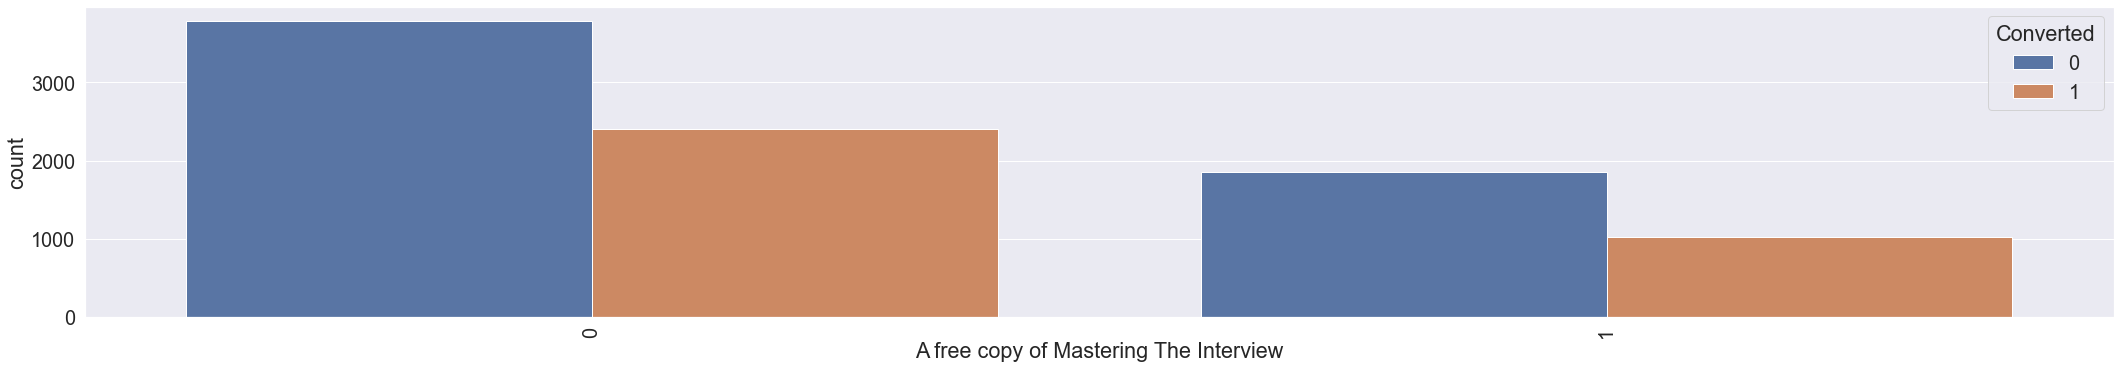

<Figure size 432x288 with 0 Axes>

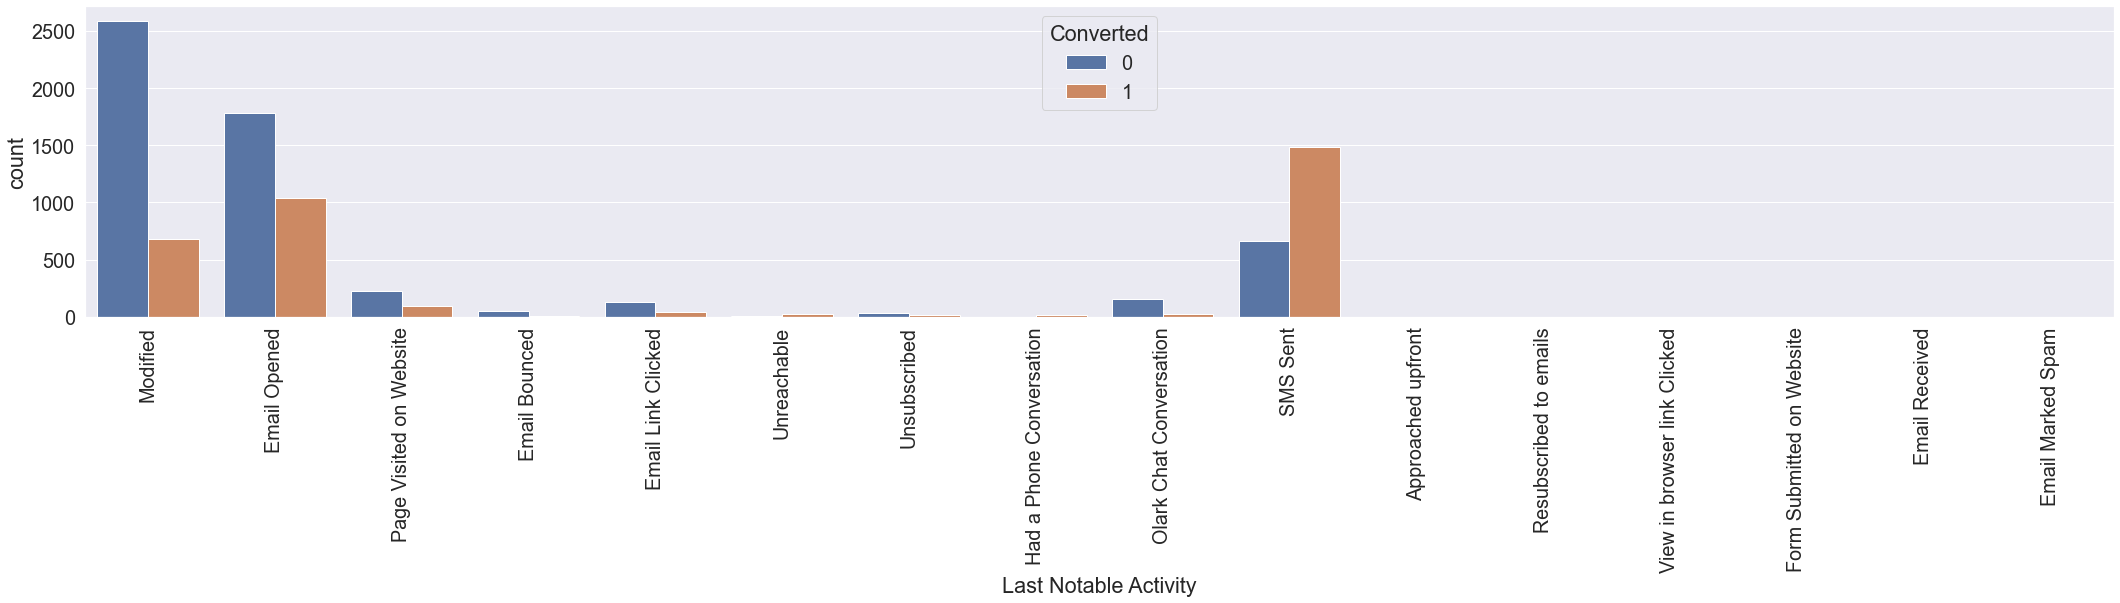

In [36]:
df1 = data.drop(['Prospect ID','TotalVisits','Total Time Spent on Website','Page Views Per Visit'],axis = 1)

df1.columns
for i, col in enumerate(df1.columns):
    plt.figure(i)
    plt.figure(figsize = (80,40))
    plt.subplot(1,2,1)
    sns.set(font_scale=1.8)
    plt.subplot(6,2,3)
    sns.countplot(df1[col], hue='Converted', data= data).tick_params(axis='x', rotation = 90)
    plt.xticks(rotation='vertical')
    
    plt.show()

Insights
1.	The origin identifier with which the customer was identified to be a lead was mainly “Landing Page Submission” and “API”. “Lead Add form” has a high conversion rate.
2.	The source of the lead is mainly Google, Direct Traffic, Olark Chart and Organic Search. People coming from Reference have a very high conversion rate.
3.	Last Activity performed by users mainly includes “Email Opened” and “SMS Sent” followed by “Page visited on website” and “Olark Chat Conversation”. “SMS Sent” have highly converted %.
4.	Most of the customers are from India.
5.	Most of the customers focused are “unemployed”, but “working professional” conversion rate is much higher than “unemployed”
6.	Since most of the customers are “unemployed” they have not selected the “Specialization”. Other Specializations include “Finance”, “HR”, “Marketing” and  “Operations” followed by other specializations.


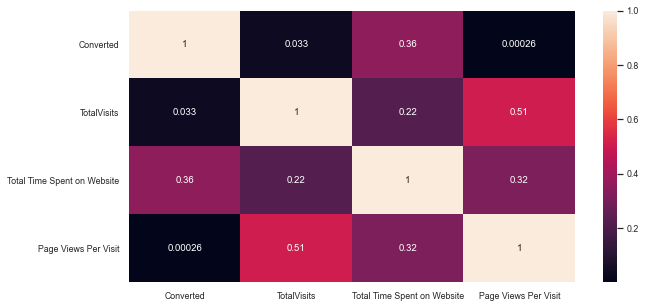

In [37]:
# checking the correlation coefficients to see which variables are highly correlated
df1 = data[['Converted', 'TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
plt.figure(figsize = (10,5))        
sns.set(font_scale=0.8)
sns.heatmap(df1.corr(),annot = True)
plt.show()

#### Checking for Outliers

In [38]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99, 0.995, 0.999])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
95%      10.000000                  1557.000000              6.000000
99%      17.000000                  1839.000000              9.000000
99.5%    21.000000                  1929.445000             11.000000
99.9%    31.854000                  2111.927000             14.463500
max     251.000000                  2272.000000             55.000000

In [39]:
data.shape

(9074, 22)

In [40]:
percentile_threshold = data['TotalVisits'].quantile(0.995)

# Get the indexes of rows where 'ABC' column has values greater than the threshold
indexes_to_drop = data[data['TotalVisits'] > percentile_threshold].index

# Drop the rows at the specified indexes
data.drop(indexes_to_drop, inplace=True)

In [41]:
# Checking outliers again
data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99, 0.995, 0.999])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9033.000000                  9033.000000           9033.000000
mean      3.291487                   482.563711              2.351138
std       3.175790                   545.377180              2.062207
min       0.000000                     0.000000              0.000000
25%       1.000000                    10.000000              1.000000
50%       3.000000                   245.000000              2.000000
75%       5.000000                   922.000000              3.000000
90%       7.000000                  1373.000000              5.000000
95%       9.000000                  1557.000000              6.000000
99%      15.000000                  1839.000000              9.000000
99.5%    17.000000                  1930.880000             10.000000
99.9%    20.000000                  2111.968000             14.000000
max      21.000000                  2272.000000             16.000000

In [42]:
data.shape

(9033, 22)

In [43]:
data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

        Country           Specialization What is your current occupation  \
0  not provided                   Select                      Unemployed   
1         India                   Select                      Unemployed   
2         India  Business Administration                         Student   
3         India    Media and Advertising                      Unemployed   
4         India                   Select                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [44]:
data.loc[:, data.dtypes == 'object'].columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

# Dummy Variables

In [45]:
dummy = pd.get_dummies(data[['Lead Origin','Specialization' ,'Lead Source', 'Last Activity', 'What is your current occupation','Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
data = pd.concat([data, dummy], axis=1)


In [46]:
#Dropping the columns as we have already created dummies
data = data.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Last Notable Activity'], 1)


In [47]:
data.head()

Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Specialization_Business Administration  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Specialization_E-Business  Specialization_E-COMMERCE  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_Finance Management  Specialization_Healthcare Management  \
0                                  0                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  0                                     0   

   Specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_Human Resource Management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                  

# Splitting the Data into Training and Testing Sets

In [48]:
list(data.columns)

['Prospect ID',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Specialization_Business Administration',
 'Specialization_E-Business',
 'Specialization_E-COMMERCE',
 'Specialization_Finance Management',
 'Specialization_Healthcare Management',
 'Specialization_Hospitality Management',
 'Specialization_Human Resource Management',
 'Specialization_IT Projects Management',
 'Specialization_International Business',
 'Specialization_Marketing Management',
 'Specialization_Media and Advertising',
 'Specialization_Operations Management',
 'Specialization_Retail Management',
 'Specialization_Rural and Agribusiness',
 'Specialization_Select',
 'Specialization_Services Excellence',
 'Specialization_Supply Chain Management',
 'Specialization_Travel and Tourism',
 'Lead Source_Direct Tr

In [49]:
# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Specialization_Business Administration  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Specialization_E-Business  Specialization_E-COMMERCE  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_Finance Management  Specialization_Healthcare Management  \
0                                  0                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  0                                     0   

   Specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_Human Resource Management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                

In [50]:
# Putting response variable to y
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [51]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [52]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1240             0            0     0.000000                     0.000000   
4988             0            0     0.190476                     0.014203   
7456             0            0     0.285714                     0.038171   
5876             0            0     0.428571                     0.027963   
3154             0            0     0.238095                     0.043054   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1240               0.00000                                       0   
4988               0.12500                                       0   
7456               0.37500                                       1   
5876               0.28125                                       1   
3154               0.15625                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1240                                    0                          0   
4988                                    0                          0   
7456                                    1                          0   
5876                                    1                          0   
3154                                    1                          0   

      Lead Origin_Lead Import  Specialization_Business Administration  \
1240                        0                                       0   
4988                        0                                       0   
7456                        0                                       0   
5876                        0                                       0   
3154                        0                                       0   

      Specialization_E-Business  Specialization_E-COMMERCE  \
1240                          0                          0   
4988                          0                          0   
7456                          0                          0   
5876                          0                          0   
3154                          0                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
1240                                  0                                     0   
4988                                  0                                     0   
7456                                  0                                     0   
5876                                  0                                     0   
3154                                  0                                     0   

      Specialization_Hospitality Management  \
1240                                      0   
4988                                      0   
7456                                      0   
5876                                      0   
3154                                      0   

      Specialization_Human Resource Management  \
1240                                         0   
4988                                         0   
7456                                         1   
5876                                         0   
3154                                         0   

      Specialization_IT Projects Management  \
1240                                      0   
4988                                      0   
7456                                      0   
5876                                      0   
3154                                      0   

      Specialization_International Business  \
1240                                      0   
4988                                      0   
7456                                      0   
5876                                      0   
3154                                      0   

      Specialization_Marketing Management  \
1240                                    0   
4988                                    1   
7456                                    0   
5876                                    1   
3154           

#### Checking the converted Rate

In [53]:
converted = (sum(data['Converted'])/len(data['Converted'].index))*100
converted

37.86117568913982

##### We have almost 38% converted rate

### Plotting Correlation matrix

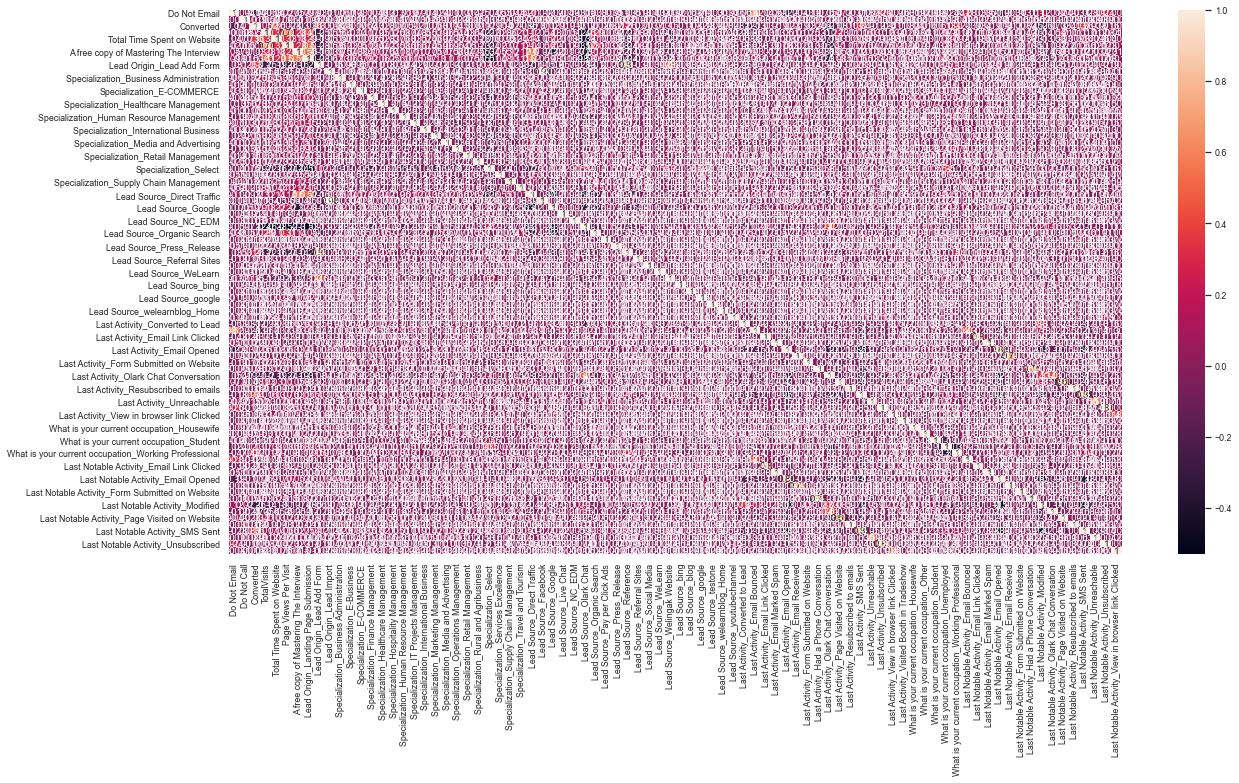

In [54]:
# checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20,10))    
sns.set(font_scale=0.8)
sns.heatmap(data.corr(),annot = True)
plt.show()

### Model Building
Feature Selection Using RFE

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 22),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 57),
 ('Lead Origin_Landing Page Submission', False, 28),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 20),
 ('Specialization_Business Administration', False, 35),
 ('Specialization_E-Business', False, 29),
 ('Specialization_E-COMMERCE', False, 27),
 ('Specialization_Finance Management', False, 30),
 ('Specialization_Healthcare Management', False, 41),
 ('Specialization_Hospitality Management', False, 66),
 ('Specialization_Human Resource Management', False, 34),
 ('Specialization_IT Projects Management', False, 32),
 ('Specialization_International Business', False, 42),
 ('Specialization_Marketing Management', False, 31),
 ('Specialization_Media and Advertising', False, 39),
 ('Specialization_Operations Management', False, 33),
 ('Specializati

In [57]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [58]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [59]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6323
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.2
Date:                Tue, 18 Jul 2023   Deviance:                       5302.4
Time:                        22:57:21   Pearson chi2:                 6.33e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7919      0.097    -28.876      0.000      -2.981      -2.602
Do Not Email                                            -1.3162      0.168     -7.819      0.000      -1.646      -0.986
TotalVisits                                              1.2782      0.310      4.124      0.000       0.671       1.886
Total Time Spent on Website                              4.2067      0.156     27.012      0.000       3.901       4.512
Page Views Per Visit                                    -2.8585      0.389     -7.347      0.000      -3.621      -2.096
Lead Origin_Lead Add Form                                3.2619      0.240     13.608      0.000       2.792       3.732
Lead Source_Direct Traffic                              -0.4747      0.078     -6.096      0.000      -0.627      -0.322
Lead Source_Welingak Website                             2.2806      1.035      2.203      0.028       0.252       4.310
Last Activity_SMS Sent                                   1.4470      0.074     19.672      0.000       1.303       1.591
What is your current occupation_Housewife               23.8770   1.61e+04      0.001      0.999   -3.15e+04    3.16e+04
What is your current occupation_Other                    2.1578      0.655      3.296      0.001       0.875       3.441
What is your current occupation_Student                  1.4196      0.226      6.289      0.000       0.977       1.862
What is your current occupation_Unemployed               1.2131      0.087     13.992      0.000       1.043       1.383
What is your current occupation_Working Professional     3.7577      0.200     18.802      0.000       3.366       4.149
Last Notable Activity_Had a Phone Conversation           3.5463      1.101      3.220      0.001       1.388       5.705
Last Notable Activity_Unreachable                        1.9756      0.546      3.620      0.000       0.906       3.045
========================================================================================================================
"""

In [60]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                                Page Views Per Visit  4.65
1                                         TotalVisits  4.20
11         What is your current occupation_Unemployed  2.33
2                         Total Time Spent on Website  2.16
4                           Lead Origin_Lead Add Form  1.60
7                              Last Activity_SMS Sent  1.53
5                          Lead Source_Direct Traffic  1.44
6                        Lead Source_Welingak Website  1.33
12  What is your current occupation_Working Profes...  1.30
0                                        Do Not Email  1.08
10            What is your current occupation_Student  1.04
8           What is your current occupation_Housewife  1.01
9               What is your current occupation_Other  1.01
13     Last Notable Activity_Had a Phone Conversation  1.01
14                  Last Notable Activity_Unreachable  1.01

In [61]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [62]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [63]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6323
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.5
Date:                Tue, 18 Jul 2023   Deviance:                       5321.1
Time:                        22:57:21   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7645      0.096    -28.845      0.000      -2.952      -2.577
Do Not Email                                            -1.3212      0.168     -7.851      0.000      -1.651      -0.991
TotalVisits                                              1.2680      0.309      4.098      0.000       0.662       1.875
Total Time Spent on Website                              4.2120      0.155     27.090      0.000       3.907       4.517
Page Views Per Visit                                    -2.8460      0.388     -7.329      0.000      -3.607      -2.085
Lead Origin_Lead Add Form                                3.3027      0.240     13.768      0.000       2.833       3.773
Lead Source_Direct Traffic                              -0.4743      0.078     -6.101      0.000      -0.627      -0.322
Lead Source_Welingak Website                             2.2426      1.035      2.166      0.030       0.213       4.272
Last Activity_SMS Sent                                   1.4387      0.073     19.584      0.000       1.295       1.583
What is your current occupation_Other                    2.1295      0.655      3.253      0.001       0.846       3.413
What is your current occupation_Student                  1.3901      0.226      6.163      0.000       0.948       1.832
What is your current occupation_Unemployed               1.1863      0.086     13.800      0.000       1.018       1.355
What is your current occupation_Working Professional     3.7305      0.200     18.698      0.000       3.339       4.122
Last Notable Activity_Had a Phone Conversation           3.5389      1.101      3.215      0.001       1.382       5.696
Last Notable Activity_Unreachable                        1.9618      0.545      3.600      0.000       0.894       3.030
========================================================================================================================
"""

In [64]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                                Page Views Per Visit  4.65
1                                         TotalVisits  4.20
10         What is your current occupation_Unemployed  2.32
2                         Total Time Spent on Website  2.15
4                           Lead Origin_Lead Add Form  1.60
7                              Last Activity_SMS Sent  1.53
5                          Lead Source_Direct Traffic  1.44
6                        Lead Source_Welingak Website  1.33
11  What is your current occupation_Working Profes...  1.30
0                                        Do Not Email  1.08
9             What is your current occupation_Student  1.04
8               What is your current occupation_Other  1.01
12     Last Notable Activity_Had a Phone Conversation  1.01
13                  Last Notable Activity_Unreachable  1.01

In [65]:
#Dropping the column
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

##### Assessing the model with StatsModels

In [66]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6323
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.1
Date:                Tue, 18 Jul 2023   Deviance:                       5330.1
Time:                        22:57:21   Pearson chi2:                 6.32e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7665      0.096    -28.853      0.000      -2.954      -2.579
Do Not Email                                            -1.3114      0.167     -7.839      0.000      -1.639      -0.984
TotalVisits                                              1.2694      0.309      4.103      0.000       0.663       1.876
Total Time Spent on Website                              4.2123      0.155     27.091      0.000       3.908       4.517
Page Views Per Visit                                    -2.8495      0.388     -7.337      0.000      -3.611      -2.088
Lead Origin_Lead Add Form                                3.6141      0.231     15.641      0.000       3.161       4.067
Lead Source_Direct Traffic                              -0.4746      0.078     -6.105      0.000      -0.627      -0.322
Last Activity_SMS Sent                                   1.4407      0.073     19.627      0.000       1.297       1.585
What is your current occupation_Other                    2.1308      0.655      3.255      0.001       0.848       3.414
What is your current occupation_Student                  1.3778      0.227      6.075      0.000       0.933       1.822
What is your current occupation_Unemployed               1.1885      0.086     13.819      0.000       1.020       1.357
What is your current occupation_Working Professional     3.7260      0.200     18.660      0.000       3.335       4.117
Last Notable Activity_Had a Phone Conversation           3.5396      1.101      3.216      0.001       1.382       5.697
Last Notable Activity_Unreachable                        1.9586      0.546      3.587      0.000       0.889       3.029
========================================================================================================================
"""

In [67]:
rfe = RFE(estimator=logreg, n_features_to_select=3)
rfe.fit(X_train, y_train)
feature_ranks = pd.DataFrame({'Feature': X_train.columns, 'Rank': rfe.ranking_})
feature_ranks = feature_ranks.sort_values(by='Rank', ascending=True)
top_features = feature_ranks.head(3)['Feature'].tolist()


In [68]:
top_features

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'What is your current occupation_Working Professional']

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6323 entries, 1240 to 5775
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6323 non-null   int64  
 1   TotalVisits                                           6323 non-null   float64
 2   Total Time Spent on Website                           6323 non-null   float64
 3   Page Views Per Visit                                  6323 non-null   float64
 4   Lead Origin_Lead Add Form                             6323 non-null   uint8  
 5   Lead Source_Direct Traffic                            6323 non-null   uint8  
 6   Last Activity_SMS Sent                                6323 non-null   uint8  
 7   What is your current occupation_Other                 6323 non-null   uint8  
 8   What is your current occupation_Student               6

In [70]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                                Page Views Per Visit  4.65
1                                         TotalVisits  4.20
9          What is your current occupation_Unemployed  2.32
2                         Total Time Spent on Website  2.15
6                              Last Activity_SMS Sent  1.53
5                          Lead Source_Direct Traffic  1.44
10  What is your current occupation_Working Profes...  1.28
4                           Lead Origin_Lead Add Form  1.27
0                                        Do Not Email  1.08
8             What is your current occupation_Student  1.04
7               What is your current occupation_Other  1.01
11     Last Notable Activity_Had a Phone Conversation  1.01
12                  Last Notable Activity_Unreachable  1.01

In [71]:
#Reshaping the values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [72]:
y_train_pred[:10]

array([0.05916338, 0.10840458, 0.06928848, 0.11889725, 0.17659558,
       0.41315689, 0.28214902, 0.44768478, 0.72302888, 0.46573559])

##### Creating a dataframe with the actual converted values and the predicted probabilities

In [73]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Converted_Prob
0          0        0.059163
1          0        0.108405
2          1        0.069288
3          0        0.118897
4          0        0.176596

##### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [74]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Predicted
0          0        0.059163          0
1          0        0.108405          0
2          1        0.069288          0
3          0        0.118897          0
4          0        0.176596          0

In [75]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3456,  454],
       [ 804, 1609]])

#### Metrics beyond simply accuracy

In [76]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.801043808318836

In [77]:
# Substituting the value of true positive
TP = confusion[1,1]

In [78]:
# Substituting the value of true negatives
TN = confusion[0,0]

In [79]:
# Substituting the value of false positives
FP = confusion[0,1] 

In [80]:
# Substituting the value of false negatives
FN = confusion[1,0]

#### Calculating the specificity

In [81]:
TN/(TN+FP)

0.8838874680306905

#### Calculating the sensitivity

In [82]:
TP/(TP+FN)

0.6668048072938251

### Plotting the ROC Curve

In [83]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

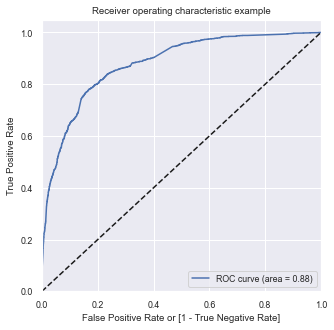

In [85]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point¶

In [86]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.059163          0    1    0    0    0    0    0    0   
1          0        0.108405          0    1    1    0    0    0    0    0   
2          1        0.069288          0    1    0    0    0    0    0    0   
3          0        0.118897          0    1    1    0    0    0    0    0   
4          0        0.176596          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [87]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.381623  1.000000  0.000000
0.1   0.1  0.600822  0.978864  0.367519
0.2   0.2  0.747746  0.885205  0.662916
0.3   0.3  0.793611  0.834231  0.768542
0.4   0.4  0.811956  0.780356  0.831458
0.5   0.5  0.801044  0.666805  0.883887
0.6   0.6  0.795034  0.586821  0.923529
0.7   0.7  0.777954  0.506838  0.945269
0.8   0.8  0.759133  0.416080  0.970844
0.9   0.9  0.706943  0.249896  0.989003

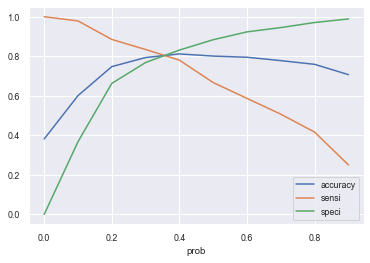

In [88]:
#Plotting 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.059163          0    1    0    0    0    0    0    0   
1          0        0.108405          0    1    1    0    0    0    0    0   
2          1        0.069288          0    1    0    0    0    0    0    0   
3          0        0.118897          0    1    1    0    0    0    0    0   
4          0        0.176596          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

In [90]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8015182666455797

In [91]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3130,  780],
       [ 475, 1938]])

In [92]:
# Substituting the value of true positive
TP = confusion2[1,1]

In [93]:
# Substituting the value of true negatives
TN = confusion2[0,0]

In [94]:
# Substituting the value of false positives
FP = confusion2[0,1] 

In [95]:
# Substituting the value of false negatives
FN = confusion2[1,0]

In [96]:
# Calculating the sensitivity
TP/(TP+FN)

0.8031496062992126

In [97]:
# Calculating the specificity
TN/(TN+FP)

0.8005115089514067

### Making predictions on the test set¶

In [98]:
# Scaling numeric values
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [99]:
# Substituting all the columns in the final train model
col = X_train.columns

In [100]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]

TotalVisits  Page Views Per Visit  Total Time Spent on Website
5147     0.761905              0.500000                     0.116289
6693     0.190476              0.125000                     0.507767
7947     0.000000              0.000000                     0.000000
6618     0.000000              0.000000                     0.000000
560      0.238095              0.104375                     0.615624
...           ...                   ...                          ...
7086     0.000000              0.000000                     0.000000
8412     0.000000              0.000000                     0.000000
8102     0.000000              0.000000                     0.000000
3625     0.190476              0.250000                     0.428318
5296     0.095238              0.125000                     0.117621

[2710 rows x 3 columns]

In [101]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

const  Do Not Email  TotalVisits  Total Time Spent on Website  \
5147    1.0             0     0.761905                     0.116289   
6693    1.0             0     0.190476                     0.507767   
7947    1.0             0     0.000000                     0.000000   
6618    1.0             0     0.000000                     0.000000   
560     1.0             0     0.238095                     0.615624   
...     ...           ...          ...                          ...   
7086    1.0             0     0.000000                     0.000000   
8412    1.0             0     0.000000                     0.000000   
8102    1.0             0     0.000000                     0.000000   
3625    1.0             0     0.190476                     0.428318   
5296    1.0             0     0.095238                     0.117621   

      Page Views Per Visit  Lead Origin_Lead Add Form  \
5147              0.500000                          0   
6693              0.125000                          0   
7947              0.000000                          1   
6618              0.000000                          0   
560               0.104375                          0   
...                    ...                        ...   
7086              0.000000                          0   
8412              0.000000                          1   
8102              0.000000                          0   
3625              0.250000                          0   
5296              0.125000                          0   

      Lead Source_Direct Traffic  Last Activity_SMS Sent  \
5147                           0                       0   
6693                           0                       0   
7947                           0                       0   
6618                           0                       0   
560                            0                       0   
...                          ...                     ...   
7086                           0                       0   
8412                           0                       1   
8102                           0                       0   
3625                           1                       0   
5296                           1                       0   

      What is your current occupation_Other  \
5147                                      0   
6693                                      0   
7947                                      0   
6618                                      0   
560                                       0   
...                                     ...   
7086                                      0   
8412                                      0   
8102                                      0   
3625                                      0   
5296                                      0   

      What is your current occupation_Student  \
5147                                        0   
6693                                        0   
7947                                        0   
6618                                        0   
560                                         0   
...                                       ...   
7086                                        0   
8412                                        0   
8102                                        0   
3625                                        0   
5296                                        0   

      What is your current occupation_Unemployed  \
5147                                           1   
6693                                           1   
7947                                           0   
6618                                           0   
560                                            1   
...                                          ...   
7086                                           1   
8412                                           1   
8102                                           1   
3625                                           1   
5296                 

In [102]:
X_train

Do Not Email  TotalVisits  Total Time Spent on Website  \
1240             0     0.000000                     0.000000   
4988             0     0.190476                     0.014203   
7456             0     0.285714                     0.038171   
5876             0     0.428571                     0.027963   
3154             0     0.238095                     0.043054   
...            ...          ...                          ...   
367              0     0.238095                     0.359077   
82               0     0.000000                     0.000000   
8236             0     0.285714                     0.307590   
7104             0     0.428571                     0.034621   
5775             0     0.000000                     0.000000   

      Page Views Per Visit  Lead Origin_Lead Add Form  \
1240               0.00000                          0   
4988               0.12500                          0   
7456               0.37500                          0   
5876               0.28125                          0   
3154               0.15625                          0   
...                    ...                        ...   
367                0.31250                          0   
82                 0.00000                          0   
8236               0.18750                          0   
7104               0.28125                          0   
5775               0.00000                          0   

      Lead Source_Direct Traffic  Last Activity_SMS Sent  \
1240                           0                       0   
4988                           1                       0   
7456                           1                       0   
5876                           1                       0   
3154                           0                       0   
...                          ...                     ...   
367                            0                       0   
82                             0                       0   
8236                           0                       0   
7104                           1                       1   
5775                           0                       0   

      What is your current occupation_Other  \
1240                                      0   
4988                                      0   
7456                                      0   
5876                                      0   
3154                                      0   
...                                     ...   
367                                       0   
82                                        0   
8236                                      0   
7104                                      0   
5775                                      0   

      What is your current occupation_Student  \
1240                                        0   
4988                                        0   
7456                                        0   
5876                                        1   
3154                                        0   
...                                       ...   
367                                         0   
82                                          0   
8236                                        0   
7104                                        0   
5775                                        0   

      What is your current occupation_Unemployed  \
1240                                           0   
4988                                           1   
7456                                           1   
5876                                           0   
3154                                           1   
...                                          ...   
367                                            0   
82                                             0   
8236                                           0   
7104                                           1   
5775                                           1   

      What is your current occupation_Working Profes

In [103]:
X_test_sm.columns

Index(['const', 'Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [104]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [105]:
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [106]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [107]:
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.175706
1          0         0.609810
2          1         0.989785
3          0         0.059163
4          1         0.734982

In [108]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.175706                0
1             0         0.609810                1
2             1         0.989785                1
3             0         0.059163                0
4             1         0.734982                1
...         ...              ...              ...
2705          0         0.171089                0
2706          1         0.970022                1
2707          0         0.171089                0
2708          1         0.327619                0
2709          0         0.048294                0

[2710 rows x 3 columns]

In [109]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8062730627306273

In [110]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1386,  317],
       [ 208,  799]])

In [111]:
# Substituting the value of true positive
TP = confusion2[1,1]

In [112]:
# Substituting the value of true negatives
TN = confusion2[0,0]

In [113]:
# Substituting the value of false positives
FP = confusion2[0,1] 

In [114]:
# Substituting the value of false negatives
FN = confusion2[1,0]

In [115]:
# Calculating the sensitivity
TP/(TP+FN)

0.7934458788480635

In [116]:
# Calculating the specificity
TN/(TN+FP)

0.8138578978273635